In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# import spacy
# from math import sqrt, pow, ex
# import Levenshtein
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
# from gensim.models import KeyedVectors
# from gensim.utils import simple_preprocess
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import plotly.express as px
import plotly.io as pio
import plotly.figure_factory as ff

pio.renderers.default = 'iframe'
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# nlp = spacy.load("en_core_web_md") 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KornkamolSampaongern\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


#### Functions

In [448]:
def pie_chart(df, group='', count='', title='', topn=False):
    if topn:
        status_counts = df.groupby(group)[count].nunique().sort_values(ascending=False)[:topn]
    else:
        status_counts = df.groupby(group)[count].nunique().sort_values(ascending=False)

    total_count = status_counts.sum()

    status_counts = status_counts[status_counts / total_count >= 0.01]

    fig = px.pie(
        names=status_counts.index, 
        values=status_counts.values, 
        color_discrete_sequence=px.colors.diverging.BrBG,
        title=title
    )
    
    fig.show()


In [449]:
def horizontal_bar_chart(df, group='', count='', title='', topn=False):
    if topn:
        status_counts = df.groupby(group)[count].nunique().sort_values(ascending=False)[:topn]
    else:
        status_counts = df.groupby(group)[count].nunique().sort_values(ascending=False)
    
    fig = px.bar(
        x=status_counts.values, 
        y=status_counts.index, 
        labels={'x': 'Count', 'y': group},
        color=status_counts.index,
        title=title,
        orientation='h', 
        color_discrete_sequence=px.colors.qualitative.Set1
    )
    
    fig.show()

In [450]:
def histogram(df, x='', title='', label='', xaxis='', yaxis=''):
    
    if not label:
        label = x
        
    fig = px.histogram(
            df,
            x=x,
            color_discrete_sequence=['#43A094'],
            title=title,
            labels={x: label})
    
    fig.update_layout(
        xaxis_title=xaxis,
        yaxis_title=yaxis,
        bargap=0.2, 
        bargroupgap=0.1 
    )
    
    fig.show()

In [451]:
def histogram_stack(df, x='', hue='', title='', label='', xaxis='', yaxis=''):
    
    if not label:
        label = x
        
    fig = px.histogram(
            df,
            x=x,
            color=hue,
            barmode='stack',
            color_discrete_sequence=['#43A094', '#44545a'],
            title=title,
            labels={x: label, hue: hue} 
    )
    
    fig.update_layout(
        xaxis_title=xaxis,
        yaxis_title=yaxis,
        bargap=0.2, 
        bargroupgap=0.1 
    )
    
    fig.show()

In [806]:
def stacked_bar_chart(df, title='', color='', x='', y=''):
    
    fig = px.bar(
            df,
            x=x,
            y=y,
            color=color,
            color_discrete_sequence=px.colors.diverging.BrBG,
            title=title,
            orientation='h',
            text='percentage')
    
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
    fig.update_layout(
        title={'text': title, 'x': 0.5, 'xanchor': 'center', 'font': {'size': 24}},
        xaxis_title={'text': x, 'font': {'size': 18}},
        yaxis_title={'text': y, 'font': {'size': 18}},
        legend_title={'text': color, 'font': {'size': 18}},
        font={'size': 18},
    )
    fig.show()

In [698]:
def stacked_barv_chart(df, title='', color='', x='', y='', xaxis_title='', yaxis_title='', legend=''):
    
    fig = px.bar(
        df,
        x=x,
        y=y,
        color=color,
        title=title,
        color_discrete_sequence=['#44545a', '#43A094'],
    )
    
    fig.update_layout(
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        legend_title=legend
    )
    
    fig.show()

In [454]:
def dist_plot(data, category, value, title='', xaxis_title='', yaxis_title='', legend_title='', color=''):

    category_names = data[category].unique()
    data = [data[data[category] == cat][value] for cat in category_names]
    
    fig = ff.create_distplot(
        data, 
        category_names, 
        colors = color,
        bin_size=.2,
    )
    
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        legend_title=legend_title,
        width=800,
        height=500,
        font=dict(
            family="Arial",
            size=14,       
            color="black"  
        ),)
    
    fig.show()

In [455]:
def generate_ngrams(words, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(words)
    list = sorted(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)), key=lambda x: x[1], reverse=True)
    return list

In [456]:
def plot_ngram_frequencies(list, n=5, title=''):
    n, f = zip(*list[:n])
    plt.figure(figsize=(10,6))
    plt.barh(n, f, color='lightsteelblue')
    plt.xlabel("Frequency")
    plt.xlabel("Frequency", fontsize=14)
    plt.yticks(fontsize=12)      
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

In [457]:
def create_wordcloud(ngram_list):
    word_freq_dict = dict(ngram_list)
    wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='ocean',max_words=30).generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

## An Analysis to Extract Context by Identifying Which Headings Contain Specific Information

### 1. Use GPT to map section content to category on 338 sample projects

In [12]:
llm_category_mapping_using_content = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/intermediate/analysis/section_mapping.csv')

In [13]:
llm_category_mapping_using_content_agg = llm_category_mapping_using_content.groupby(['id','heading_name']).agg({'mapped_categories':', '.join}).reset_index()

In [14]:
llm_category_mapping_using_content_agg['mapped_categories_len'] = llm_category_mapping_using_content_agg['mapped_categories'].str.len()
llm_category_mapping_using_content_agg = llm_category_mapping_using_content_agg.sort_values(by='mapped_categories_len', ascending=False)

In [15]:
pd.set_option('display.max_colwidth', None)

In [16]:
llm_category_mapping_using_content_agg[['heading_name', 'mapped_categories']]

,heading_name,mapped_categories
212,1.12.4 Participation under Other GHG Programs,"project_title, other_entities, project_proponent, project_start_date, project_summary, leakage_analysis, ghg_emission_reduction, date_issue_of_project, standard, project_size, project_location, project_country, version_of_file, expected_first_vintage_of_credit_issuance, additional_analysis, project_lifetime, baseline_analysis, natural_catastrophe_climate_change"
374,2.4.7 Commercially Sensitive Information (Rules 3.5.13 – 3.5.14),"project_title, other_entities, project_proponent, project_start_date, project_summary, leakage_analysis, ghg_emission_reduction, date_issue_of_project, standard, project_size, project_location, project_country, version_of_file, expected_first_vintage_of_credit_issuance, additional_analysis, project_lifetime, baseline_analysis, natural_catastrophe_climate_change"
213,1.12.5 Projects Rejected by Other GHG Programs,"project_title, other_entities, project_proponent, project_start_date, project_summary, leakage_analysis, ghg_emission_reduction, date_issue_of_project, standard, project_size, project_location, project_country, version_of_file, expected_first_vintage_of_credit_issuance, additional_analysis, project_lifetime, baseline_analysis, natural_catastrophe_climate_change"
41,1.12. Other Forms of Environmental Credit:,"project_title, other_entities, project_proponent, project_start_date, project_summary, leakage_analysis, ghg_emission_reduction, date_issue_of_project, standard, project_size, project_location, project_country, version_of_file, expected_first_vintage_of_credit_issuance, additional_analysis, project_lifetime, baseline_analysis, natural_catastrophe_climate_change"
250,1.15.2 ProjectsRejectedby Other GHGPrograms,"project_title, other_entities, project_proponent, project_start_date, project_summary, leakage_analysis, ghg_emission_reduction, date_issue_of_project, standard, project_size, project_location, project_country, version_of_file, expected_first_vintage_of_credit_issuance, additional_analysis, project_lifetime, baseline_analysis, natural_catastrophe_climate_change"
...,...,...
446,Calibration,standard
28,"Project technologies, products, services and the expected",standard
179,Title and reference of the VCS methodology applied to,standard
479,"Compliance with Laws, Statutes and Other Regulatory Frameworks",standard


##### >>> The current mapping results are not accurate, with each heading being associated with nearly all categories. This issue may stem from keyword occurrences in the content or potential model hallucinations. Moreover, the model sometimes generates categories beyond those explicitly requested, reflecting its inherent creativity.

### 2. Use GPT to map heading to category on 338 sample projects

In [17]:
llm_category_mapping_using_heading = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/intermediate/analysis/heading_mapping.csv')
scraped_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/input/scraped_data.csv')

In [18]:
llm_category_mapping_using_heading = pd.merge(llm_category_mapping_using_heading, scraped_df, on=['id','filename'])

In [19]:
# Using GPT to generate country from state/city/province
country_mapping = {
    "Rio Grande do Sul and Santa Catarina": "Brazil",
    "Sichuan Province": "China",
    "Gansu": "China",
    "Guizhou": "China",
    "Mato Grosso do Sul": "Brazil",
    "Regions RM, V, VI, VII, VIII": "Chile",
    "Pernambuco": "Brazil",
    "Guizhou Province": "China",
    "PA": "Brazil",
    "Henan Province": "China",
    "Jaisalmer district in Rajasthan": "India",
    "Madre de Dios": "Peru",
    "Karnataka": "India",
    "Department Francisco Morazán": "Honduras",
    "Pará": "Brazil",
    "Southern Atlantic Autonomous Region (RAAS)": "Nicaragua",
    "Pará state": "Brazil",
    "Hebei Province": "China",
    "Songyuan City, Jilin Province": "China",
    "Jilin": "China",
    "San Paulo": "Brazil",
    "Eastern Mediterranean Region": "Turkey",
    "Nakhorn Ratchasima Province": "Thailand",
    "Rio de Janeiro": "Brazil",
    "Beijing": "China",
    "southern bank of the Valparaiso River": "Argentina",
    "northern bank of the Valparaiso River": "Argentina",
    "Amapá": "Brazil",
    "Himachal Pradesh": "India",
    "Brazilian Amazon": "Brazil",
    "Gorno-Badakhshan Autonomous Oblast (GBAO)": "Tajikistan",
    "East Sepik province": "Papua New Guinea",
    "Peruvian Amazon Basin": "Peru",
    "Chungchongnam-do": "South Korea",
    "Amazonas State": "Brazil",
    "Uttar Pradesh": "India",
    "MA": "United States",
    "Jiangxi": "China",
    "Tamil nadu": "India",
    "West Java Province": "Indonesia",
    "Region XIV": "Chile",
    "Uttaranchal": "India",
    "Elazığ and Tunceli Provinces": "Turkey",
    "Eastern and Southern Provinces": "Zambia",
    "Lusaka": "Zambia",
    "Jurisdictions of Elazığ and Tunceli Provinces": "Turkey",
    "Tucumán": "Argentina",
    "Yunnan": "China",
    "Liaoning province": "China",
    "Sindh": "Pakistan",
    "Nyanza and Western provinces": "Kenya",
    "State of Para, micro region of Porte": "Brazil",
    "Colombian Orinoco": "Colombia",
    "Gujarat": "India",
    "Tahuamanu": "Peru",
    "Andhra Pradesh": "India",
    "New Ireland and East New Britain Province": "Papua New Guinea",
    "Tamilnadu": "India",
    "District: Mohali": "India",
    "Shandong Province": "China",
    "Guangxi Zhuang Autonomous Region": "China",
    "Toamasina Province": "Madagascar",
    "OK": "United States",
    "Multiple States/Provinces": "Various",
    "Kutch, Gujarat": "India",
    "Casamance": "Senegal",
    "Lindi": "Tanzania",
    "Para State": "Brazil",
    "Hubei Province": "China",
    "San Pedro, Canindeyu": "Paraguay",
    "Anhui Province": "China",
    "Oromia Regional State": "Ethiopia",
    "IL": "United States",
    "Gansu Province": "China",
    "Tamilnadu & Karnataka": "India",
    "Jilin Province": "China",
    "Jiangsu Province": "China",
    "Orientale Province": "DR Congo",
    "Ucayali": "Peru",
    "Guangxi": "China",
    "Tonkolili and Port Loko Districts": "Sierra Leone",
    "Caldas": "Colombia",
    "Odisha, Andhra Pradesh and Chhattisgarh": "India",
    "Acre": "Brazil",
    "Ashanti": "Ghana",
    "KY": "United States",
    "Nariño": "Colombia",
    "Chocó": "Colombia",
    "Santa Catarina": "Brazil",
    "Peten": "Guatemala",
    "Inner Mongolia Autonomous Region": "China",
    "Central East region": "Brazil",
    "Eastern & Uva Provinces": "Sri Lanka",
    "Department of Vichada": "Colombia",
    "Izabal": "Guatemala",
    "Bursa Province": "Turkey",
    "Rajasthan": "India",
    "Taiba Ndiaye": "Senegal",
    "Zhejiang Province": "China",
    "state of Rondônia": "Brazil",
    "Madhya Pradesh": "India",
    "Yong’an City, Fujian Province": "China",
    "Punjab Andhra Pradesh & others": "India",
    "NE states": "India",
    "Coast": "Kenya",
    "Presidente Hayes Department": "Paraguay",
    "Antioquia and Arauca": "Colombia",
    "Chongqing": "China",
    "Chhattisgarh": "India",
    "Eastern provinces": "Sierra Leone",
    "District: Siddipet, State: Telangana": "India",
    "BC": "Canada",
    "Coast Province": "Kenya",
    "Punjab": "India",
    "MI": "United States",
    "Mondulkiri": "Cambodia",
    "State: Amazonas": "Brazil",
    "VA": "United States",
    "NSW": "Australia",
    "Fujian Province": "China",
    "Toledo District": "Belize",
    "Acre and Amazonas": "Brazil",
    "State of Mato Grosso": "Brazil",
    "Karnataka, Tamil Nadu": "India",
    "Sabah": "Malaysia",
    "Kabarole": "Uganda",
    "Central Kalimantan": "Indonesia",
    "Guangxi Province": "China",
    "Chattishgarh": "India",
    "Inner Mongolia Autonomous": "China",
    "Inner Mongolia Autonomous Region": "China",
    "Guatemala COUNTRY-WIDE": "Guatemala",
    "Multi State": "Various",
    "Haryana": "India",
    "Chitradurga District of Karnataka": "India",
    "ÇANKIRI": "Turkey",
    "Tabasco": "Mexico",
    "Guangdong Province": "China",
    "Koh Kong Province": "Cambodia",
    "Kabupaten Batubara, Sumetera Utara": "Indonesia",
    "Jamnagar and Rajkot districts": "India",
    "Central, Rift Valley and Eastern Provinces": "Kenya",
    "ND": "United States",
    "Telangana, Gujarat, Rajasthan": "India",
    "Telangana,": "India",
    "Eastern and Lusaka Province": "Zambia",
    "Rize": "Turkey",
    "SD": "United States",
    "Sikkim state": "India",
    "Andhra Pradesh, Rajasthan, Karnataka": "India",
    "Shanxi Province": "China",
    "Sine Saloum and Casamance": "Senegal",
    "Shenzhen City, Guangdong Province": "China",
    "Multiple State": "Various",
    "San Martin": "Peru",
    "Eastern Uganda": "Uganda",
    "Qinghai": "China",
    "Odisha": "India",
    "Multiple States": "Various",
    "Rondônia and Amazonas": "Brazil",
    "Pará State, Eastern Amazon": "Brazil",
    "XinJiang": "China",
    "Ningxia Autonomous Region, P. R. China": "China",
    "Orange Walk": "Belize",
    "Department of Chocó and the Municipality of Acandí": "Colombia",
    "Mariscal Cáceres and Huallaga Provinces": "Peru",
    "Telengana and Maharashtra": "India",
    "Department of Madre de Dios": "Peru",
    "AK": "United States",
    "Hunan Province": "China",
    "Tanganyika District": "Tanzania",
    "Mato Grosso": "Brazil",
    "South Sumatra Province": "Indonesia",
    "Kiteto District": "Tanzania",
    "State of Bahia": "Brazil",
    "Choco": "Colombia",
    "Valle": "Colombia",
    "Valle de Cauca": "Colombia",
    "Antioquia and Choco": "Colombia",
    "Department of Cauca": "Colombia",
    "Inner Mongolia Autonomous": "China",
    "Chengde City, Hebei Province": "China",
    "Makueni, Taita Taveta, and Kajiado Counties": "Kenya",
    "Matabeleland North, Midlands, Mashonaland West, and Mashonaland Central": "Zimbabwe",
    "Hebei": "China",
    "Uttar Pradesh, Telangana, Andhra Pradesh, Gujarat": "India",
    "Inner Mongolia": "China",
    "Jammu & Kashmir": "India",
    "Saraburi, Lampang,  Nakon Si Thammarat": "Thailand",
    "Nakhon Ratchasima": "Thailand",
    "Para": "Brazil",
    "Mai Ndombe": "DR Congo",
    "Sichuan": "China",
    "Maharashtra": "India",
    "Rajasthan, Gujarat, Karnataka, Tamil Nadu, Ma": "India",
    "Dhaka": "Bangladesh",
    "SC": "United States",
    "Chongqing, Yunnan, Sichuan and Guizhou Province": "China",
    "West Bengal": "India",
    "San Martin province": "Peru",
    "Cerro Chato/ Valentines and Regis/ Garao Regions": "Uruguay",
    "Cerro Largo and Treinta y Tres": "Uruguay",
    "Amazonas": "Brazil",
    "San Juan": "Argentina",
    "Vichada": "Colombia",
    "Jiangsu": "China",
    "TX": "United States",
    "Para, micro region of Portel": "Brazil",
    "East Godavari District, Andhra Pradesh": "India",
    "Aceh and North Sumatra provinces": "Indonesia",
    "San Martin and Amazonas": "Peru",
    "Multiple": "Various",
    "Rayong": "Thailand",
    "municipalities of Machadinho d’Oeste and Cujubim": "Brazil",
    "South-Western and South-Eastern provinces": "Uganda",
    "Bengkulu": "Indonesia",
    "North Sumatra Province": "Indonesia",
    "Free State and Mpumalanga provinces": "South Africa",
    "District of Kullu of Himachal Pradesh": "India",
    "Tamil Nadu, Karnataka, Andhra Pradesh": "India",
    "Tuyen Quang Province": "Vietnam",
    "Rio de Janiero": "Brazil",
    "Ordu Province": "Turkey",
    "Eastern Province": "Zambia"
}

country_df = pd.DataFrame(list(country_mapping.items()), columns=['State/Province', 'Country'])

In [20]:
llm_category_mapping_using_heading  = pd.merge(llm_category_mapping_using_heading , country_df, on='State/Province', how='left')

In [21]:
llm_category_mapping_using_heading[~llm_category_mapping_using_heading['category'].isna()][['category', 'heading']]

,category,heading
0,project_summary,1.1 Summary Description of the Project
1,sector,1.2 Sectoral Scope and Project Type
4,project_proponent,1.5 Project Proponent
5,other_entities,1.6 Other Entities Involved in the Project
7,project_start_date,1.8 Project Start Date
...,...,...
14760,methodology,2.2 Applicability of Methodology
14762,baseline_analysis,2.4 Baseline Scenario
14763,additional_analysis,2.5 Additionality
14764,methodology,2.6 Methodology Deviations


In [22]:
llm_category_mapping_using_heading.columns

Index(['id', 'filename', 'heading', 'category', 'title', 'description',
       'State/Province', 'Proponent', 'VCS Project Status',
       'Estimated Annual Emission Reductions', 'VCS Project Type',
       'VCS Methodology', 'VCS Project Validator', 'Project Registration Date',
       'Crediting Period Term', 'link', 'filename_raw', 'updated_date',
       'file_size', 'Country'],
      dtype='object')

In [23]:
llm_category_mapping_using_heading['heading_number'] = llm_category_mapping_using_heading['heading'].str.extract(r'(\d+\.\d+)')
llm_category_mapping_using_heading['heading_name'] = llm_category_mapping_using_heading['heading'].str.extract(r'\d+\.\d+\s+(.*)')
llm_category_mapping_using_heading['section'] = llm_category_mapping_using_heading['heading_number'].str.split('.').str[0]

In [24]:
categories = [
     'project_proponent'
    ,'ghg_emission_reduction'
    ,'crediting_period'
    ,'sector'
    ,'methodology'
    ,'project_location'
    ]

In [25]:
pie_chart(llm_category_mapping_using_heading, group='VCS Project Status', count='id')

In [26]:
pie_chart(llm_category_mapping_using_heading, group='VCS Project Type', count='id')

In [27]:
pie_chart(llm_category_mapping_using_heading, group='Country', count='id', topn=15)

In [28]:
llm_category_mapping_using_heading['Project Registration Date'] = pd.to_datetime(llm_category_mapping_using_heading['Project Registration Date'], errors='coerce')
llm_category_mapping_using_heading['Project Registration Year-Month'] = llm_category_mapping_using_heading['Project Registration Date'].dt.to_period('M').astype(str)
llm_category_mapping_using_heading['Project Registration Year'] = llm_category_mapping_using_heading['Project Registration Date'].dt.to_period('Y').astype(str)
llm_category_mapping_using_heading['Project Registration Year'] = llm_category_mapping_using_heading['Project Registration Year'].replace('NaT', 'Not Available')

C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_19776\1297603502.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [29]:
pie_chart(llm_category_mapping_using_heading, group='Project Registration Year', count='id')

In [30]:
llm_category_mapping_using_heading['Project Registration Year'] = pd.to_numeric(llm_category_mapping_using_heading['Project Registration Year'],errors='coerce')
histogram(llm_category_mapping_using_heading, x='Project Registration Year', title='Distribution of Project Registration Date', label='Year', xaxis='Project Registration Year', yaxis='Project Count')

In [809]:
filtered_df = llm_category_mapping_using_heading[llm_category_mapping_using_heading['category'].isin(categories)]
agg_data = filtered_df.groupby(['category', 'section'])['id'].nunique().unstack(fill_value=0)
percentage_data = agg_data.div(agg_data.sum(axis=1), axis=0) * 100
percentage_data = percentage_data.reset_index().melt(id_vars='category', var_name='section', value_name='percentage')

stacked_bar_chart(percentage_data, title='Distribution of Heading Across Sections', color='section', x='percentage', y='category')

In [476]:
# llm_category_mapping_using_heading = llm_category_mapping_using_heading[llm_category_mapping_using_heading['section'].isin(['1','2','3','4','5','6','7','8','9'])]

#### >> Project Proponent

In [33]:
agg_data.loc['project_proponent']

section
1      210
2       34
294      0
3        1
4        0
5        0
6        0
7        0
8        0
9        0
Name: project_proponent, dtype: int64

In [35]:
# df[(df['category']=='project_proponent')&(df['section']=='2')]['heading_name'].unique()

In [36]:
# df[(df['category']=='project_proponent')&(df['section']=='3')]['heading_name'].unique()

The majority of Project Proponents are predominantly located in Section 1, with a smaller proportion occasionally found in Sections 2 and 3.

In [37]:
project_proponents = ["project proponent"]
ghg_emission_reductions = ["ghg emission reduction"]
methodology = ["methodology", "methodologies"]
project_desc = ["project location", "project description"]
credit_period = ["crediting period"]
sector = ["scope", "project type"]

In [38]:
agg_data.loc['other_entities']

KeyError: 'other_entities'

In [ ]:
df[(df['category']=='other_entities')&(df['section']=='2')]['heading_name'].unique()

In [ ]:
agg_data.loc['project_summary']

In [ ]:
df[(df['category']=='project_summary')&(df['section']=='2')]['heading_name'].unique()

In [ ]:
agg_data.loc['project_start_date']

In [ ]:
df[(df['category']=='project_start_date')&(df['section']=='2')]['heading_name'].unique()

In [ ]:
df[(df['category']=='project_start_date')&(df['section']=='3')]['heading_name'].unique()

#### >> ghg_emission_reduction

In [ ]:
agg_data.loc['ghg_emission_reduction']

In [ ]:
df[(df['category']=='ghg_emission_reduction')&(df['section']=='2')]['heading_name'].unique()

In [ ]:
df[(df['category']=='ghg_emission_reduction')&(df['section']=='3')]['heading_name'].unique()

In [ ]:
df[(df['category']=='ghg_emission_reduction')&(df['section']=='4')]['heading_name'].unique()

In [ ]:
df[(df['category']=='ghg_emission_reduction')&(df['section']=='5')]['heading_name'].unique()

In [ ]:
df[(df['category']=='ghg_emission_reduction')&(df['section']=='7')]['heading_name'].unique()

In [ ]:
df[(df['category']=='ghg_emission_reduction')&(df['section']=='8')]['heading_name'].unique()

In [ ]:
df[(df['category']=='ghg_emission_reduction')&(df['section']=='9')]['heading_name'].unique()

ghg_emission_reduction normally stay in section 1 and can be up until section 8.

#### >> project_location

In [ ]:
agg_data.loc['project_location']

In [ ]:
df[(df['category']=='project_location')&(df['section']=='3')]['heading_name'].unique()

### 3. Analysis on headings across all 2,500 projects

In [990]:
toc = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/intermediate/analysis/table_of_contents.csv')
scraped_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/input/scraped_data.csv')

In [991]:
toc['heading'] = toc['section']
toc['next_section_page'] = toc['end_page'].astype(int)
toc['section_number'] = toc['section'].str.split(' ', n=1).str[0]
toc['section'] = toc['section_number'].str.split('.', n=1).str[0]

In [992]:
project_sector = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/input/additional_project_information.csv', dtype='str')
project_sector = project_sector[(project_sector['UID'].str.startswith('VCS'))&(project_sector['Project Sector'].isin(['Forestry and Land Use', 'Renewable Energy']))]
project_sector['ID'] = project_sector['UID'].str.split('VCS', n=1).str[1].astype('int64')
project_sector = project_sector[['ID','Registry','Project Sector','Project Country','Project Methodologies','Project Region','Project Continent']]

In [993]:
toc = toc.merge(project_sector, how='left', right_on='ID', left_on='id')

In [994]:
toc.drop(['ID'], axis=1, inplace=True)

In [995]:
toc = toc.merge(scraped_df, how='left', on='id')
toc['Project Registration Date'] = pd.to_datetime(toc['Project Registration Date'], errors='coerce')
toc['Project Registration Year'] = toc['Project Registration Date'].dt.to_period('Y').astype(str)
toc['Project Registration Year'] = toc['Project Registration Year'].replace('NaT', 'Not Available')

C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_19776\1405424261.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [996]:
stats = toc.groupby('id').agg(min_page=('start_page', 'min'),
                              max_page=('start_page', 'max'),
                              number_of_sections=('section', 'max'))
stats['page_number'] = stats['max_page']-stats['min_page']

In [997]:
toc = toc.merge(stats, how='left', right_on='id', left_on='id')

In [998]:
toc = toc[toc['VCS Project Type'].isin(['Agriculture Forestry and Other Land Use', 'Energy industries (renewable/non-renewable sources)'])]

In [999]:
toc_project_level = toc[['id', 'Project Sector', 'Project Country',
                         'Project Methodologies', 'Project Region', 'Project Continent',
                         'number_of_sections', 'page_number','VCS Project Status', 'VCS Project Type','Project Registration Year']].drop_duplicates()

In [661]:
pie_chart(toc_project_level, group='VCS Project Status', count='id')

In [662]:
pie_chart(toc_project_level, group='VCS Project Type', count='id')

In [663]:
pie_chart(toc_project_level, group='Project Country', count='id', topn=15)

In [664]:
pie_chart(toc_project_level, group='Project Registration Year', count='id')

In [665]:
toc_project_level_avaiable_year = toc_project_level[toc_project_level['Project Registration Year']!='Not Available']
pie_chart(toc_project_level_avaiable_year, group='Project Registration Year', count='id')

In [671]:
toc_project_level_avaiable_year['Project Registration Year'] = pd.to_numeric(toc_project_level_avaiable_year['Project Registration Year'],errors='coerce')
histogram(toc_project_level_avaiable_year, x='Project Registration Year', label='Year', xaxis='Project Registration Year', yaxis='Project Count')

#### 1. Is there a trend in the total number of sections and pages across different sectors or countries?

In [820]:
def letter_to_number(letter):
    if letter.isalpha():
        return ord(letter.lower()) - ord('a') + 1 
    return letter

toc_project_level['number_of_sections'] = toc_project_level['number_of_sections'].apply(letter_to_number)
toc_project_level['number_of_sections'] = toc_project_level['number_of_sections'].astype('int')

In [821]:
toc_project_level = toc_project_level[toc_project_level['number_of_sections'] < 20]

In [696]:
dist_plot(toc_project_level, 'Project Sector', 'number_of_sections', 
    title='Number of Sections on Different Project Sectors',
    xaxis_title='Number of Sections',
    yaxis_title='Density',
    legend_title='Project Sector',
    color=['#44545a', '#43A094'])

In [697]:
dist_plot(toc_project_level, 'Project Sector', 'page_number', 
    title='Total Page Number on Different Project Sectors',
    xaxis_title='Number of Pages',
    yaxis_title='Density',
    legend_title='Project Sector',
    color=['#44545a', '#43A094'])

In [699]:
df_counts = toc_project_level_avaiable_year.groupby(['Project Registration Year', 'Project Sector'])['id'].nunique().reset_index()
df_counts.columns = ['Project Registration Year', 'Project Sector', 'Unique ID Count']

stacked_barv_chart(df_counts, title='Total Projects by Year and Sector', color='Project Sector', \
                   x='Project Registration Year', y='Unique ID Count', xaxis_title='Project Registration Year', \
                   yaxis_title='Project Count', legend='Project Sector')

#### Forestry and Land Use projects tend to have more sections and pages in their PDDS.

In [58]:
filtered = toc_project_level[~toc_project_level['Project Region'].isna()]

In [59]:
dist_plot(filtered, 'Project Region', 'page_number', 
    title='Total Page Number on Different Project Region',
    xaxis_title='Page Number',
    yaxis_title='Density',
    legend_title='Project Region')

In [60]:
dist_plot(filtered, 'Project Region', 'number_of_sections', 
    title='Total Section on Different Project Region',
    xaxis_title='Total Section',
    yaxis_title='Density',
    legend_title='Project Region')

#### No significant patterns were observed across different regions.

#### Filter Country with more than 20 projects

In [61]:
country_counts = toc_project_level.groupby('Project Country').agg(Total_Count=('id', 'count')).reset_index()
filtered_country = country_counts[country_counts['Total_Count'] > 20]
filtered_project = toc_project_level[toc_project_level['Project Country'].isin(filtered_country['Project Country'].to_list())]

In [62]:
dist_plot(filtered_project, 'Project Country', 'number_of_sections', 
    title='Total Section on Different Project Country',
    xaxis_title='Total Section',
    yaxis_title='Density',
    legend_title='Project Country')

In [63]:
dist_plot(filtered_project, 'Project Country', 'page_number', 
    title='Total Page Number on Different Project Country',
    xaxis_title='Page Number',
    yaxis_title='Density',
    legend_title='Project Country')

#### Columbia, Brazil, and Peru tends to have longer pages and cover more sections.

#### 2. Are all the defined keywords sufficient for extracting relevant sections?

In [64]:
total_ids = toc.id.nunique()

##### 1. proponents

Project 562/1429 lack of the headings format, not able to extract

Project 2403/1748 some part of text (section number) are embeded in the PDF, cannot be detected as text

In [65]:
pattern = '|'.join(project_proponents)
matched_proponent = toc[toc['toc'].str.lower().str.contains(pattern)]

In [66]:
toc.loc[toc['id'].isin(matched_proponent['id'].tolist()), 'Section'] = 'Project Proponent'

In [67]:
matched_proponent.id.nunique()

2205

In [68]:
total_ids-matched_proponent.id.nunique()

320

##### 2. emission reductions

In [69]:
pattern = '|'.join(ghg_emission_reductions)
matched_emission_reductions = toc[toc['toc'].str.lower().str.contains(pattern)]

In [70]:
toc.loc[toc['id'].isin(matched_emission_reductions['id'].tolist()), 'Section'] = 'GHG Emission Reductions'

In [71]:
matched_emission_reductions.id.nunique()

2206

In [72]:
total_ids-matched_emission_reductions.id.nunique()

319

##### 3. methodology

In [73]:
pattern = '|'.join(methodology)
matched_methodology = toc[toc['toc'].str.lower().str.contains(pattern)]

In [74]:
toc.loc[toc['id'].isin(matched_methodology['id'].tolist()), 'Section'] = 'Methodologies'

In [75]:
matched_methodology.id.nunique()

2488

In [76]:
total_ids-matched_methodology.id.nunique()

37

##### 4. project_description

In [77]:
pattern = '|'.join(project_desc)
matched_project_desc = toc[toc['toc'].str.lower().str.contains(pattern)]

In [78]:
toc.loc[toc['id'].isin(matched_project_desc['id'].tolist()), 'Section'] = 'Project Description'

In [79]:
matched_project_desc.id.nunique()

2070

In [80]:
total_ids-matched_project_desc.id.nunique()

455

##### 5. Credit Period

In [81]:
pattern = '|'.join(credit_period)
matched_credit_period = toc[toc['toc'].str.lower().str.contains(pattern)]

In [82]:
toc.loc[toc['id'].isin(matched_credit_period['id'].tolist()), 'Section'] = 'Credit Period'

In [83]:
matched_credit_period.id.nunique()

2476

In [84]:
total_ids-matched_credit_period.id.nunique()

49

##### 6. sector

In [85]:
pattern = '|'.join(sector)
matched_sector = toc[toc['toc'].str.lower().str.contains(pattern)]

In [86]:
toc.loc[toc['id'].isin(matched_sector['id'].tolist()), 'Section'] = 'Sector'

In [87]:
matched_sector.id.nunique()

1973

In [88]:
total_ids-matched_sector.id.nunique()

552

#### 3. What are the typical sections (e.g., 1.1.2 Project Detail) and the usual page ranges and percentages for each question? Do these trends vary by country or sector?

In [89]:
matched_proponent['Section'] = 'Project Proponent'
matched_emission_reductions['Section'] = 'GHG Emission Reductions'
matched_methodology['Section'] = 'Methodologies'
matched_project_desc['Section'] = 'Project Description'
matched_credit_period['Section'] = 'Credit Period'
matched_sector['Section'] = 'Sector'


dfs = [matched_proponent, 
       matched_emission_reductions, 
       matched_methodology, 
       matched_project_desc, 
       matched_credit_period, 
       matched_sector]

stacked_df = pd.concat(dfs, axis=0, ignore_index=True)

In [718]:
stacked_df = stacked_df[stacked_df['section']!='0']
stacked_df = stacked_df[stacked_df['section']!='v']
mapping_dict = {chr(i): i - 64 for i in range(65, 91)}

def map_alphabet_to_digit(value):
    if isinstance(value, str) and value.isalpha():
        return mapping_dict.get(value, value)
    return value

stacked_df['section'] = stacked_df['section'].apply(map_alphabet_to_digit).astype('str')

In [91]:
agg_data = stacked_df.groupby(['Section', 'section'])['id'].nunique().unstack(fill_value=0)
percentage_data = agg_data.div(agg_data.sum(axis=1), axis=0) * 100
percentage_data.reset_index(inplace=True)
plot_data_long = percentage_data.melt(id_vars='Section', var_name='Section Type', value_name='percentage')

stacked_bar_chart(
    df=plot_data_long,
    title='Percentage of Sections within Each Category',
    color='Section Type',
    x='percentage',
    y='Section'
)

In [92]:
sector_df = stacked_df[stacked_df['Project Sector'] == 'Renewable Energy']

dist_plot(
    sector_df, 
    'Section', 
    'page', 
    title='Total Section on Different Project Country',
    xaxis_title='Page Number',
    yaxis_title='Density',
    legend_title='Project Country'
)

In [93]:
sector_df = stacked_df[stacked_df['Project Sector'] == 'Forestry and Land Use']

dist_plot(
    sector_df, 
    'Section', 
    'page', 
    title='Total Section on Different Project Country',
    xaxis_title='Page Number',
    yaxis_title='Density',
    legend_title='Project Country'
)

### 4. Analysis on projects that cannot be matched

In [94]:
non_matched_ids = (
    set(toc[~toc['id'].isin(matched_proponent['id'])]['id'].unique()) |
    set(toc[~toc['id'].isin(matched_emission_reductions['id'])]['id'].unique()) |
    set(toc[~toc['id'].isin(matched_methodology['id'])]['id'].unique()) |
    set(toc[~toc['id'].isin(matched_project_desc['id'])]['id'].unique()) |
    set(toc[~toc['id'].isin(matched_credit_period['id'])]['id'].unique()) |
    set(toc[~toc['id'].isin(matched_sector['id'])]['id'].unique())
)
sorted_non_matched_ids = sorted(non_matched_ids)
len(sorted_non_matched_ids)

743

In [95]:
outlier_projects = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/intermediate/analysis/keywords_found_in_pages.csv')

In [99]:
outlier_projects = outlier_projects.merge(toc, on='id', how='left')

In [100]:
outlier_projects.columns

Index(['Category', 'Page Number', 'id', 'toc', 'page', 'filename_x',
       'next_section_page', 'section_number', 'section', 'Registry',
       'Project Sector', 'Project Country', 'Project Methodologies',
       'Project Region', 'Project Continent', 'title', 'description',
       'State/Province', 'Proponent', 'VCS Project Status',
       'Estimated Annual Emission Reductions', 'VCS Project Type',
       'VCS Methodology', 'VCS Project Validator', 'Project Registration Date',
       'Crediting Period Term', 'link', 'filename_raw', 'filename_y',
       'updated_date', 'file_size', 'Project Registration Year', 'min_page',
       'max_page', 'number_of_sections', 'page_number', 'Section'],
      dtype='object')

In [101]:
df = outlier_projects[['Category','toc']]
df['section_number'] =df['toc'].str.split(' ', n=1).str[0]
df['heading'] =df['toc'].str.split(' ', n=1).str[-1]
df['section'] = df['section_number'].str.split('.', n=1).str[0]

In [102]:
df['section'] = df['section'].str.upper()

In [103]:
df = df[df['section']!='0']
df = df[df['section']!='v']
mapping_dict = {chr(i): i - 64 for i in range(65, 91)}

def map_alphabet_to_digit(value):
    if isinstance(value, str) and value.isalpha():
        return mapping_dict.get(value, value)
    return value

df['section'] = df['section'].apply(map_alphabet_to_digit).astype('int')

In [104]:
df = df[
    ((df['Category'] == 'Project Proponent') & (df['section'].isin([1, 2]))) |
    ((df['Category'] == 'Sector') & (df['section'].isin([1, 2]))) |
    ((df['Category'] == 'Project Description') & (df['section'].isin([1, 2]))) |
    ((df['Category'] == 'Credit Period') & (df['section'].isin([1, 2, 3]))) |
    ((df['Category'] == 'Methodologies') & (df['section'].isin([2, 3, 4]))) |
    ((df['Category'] == 'GHG Emission Reductions') & (df['section'].isin([1, 2, 3, 4, 5, 6, 7])))
]

In [105]:
sns.set_style('whitegrid')

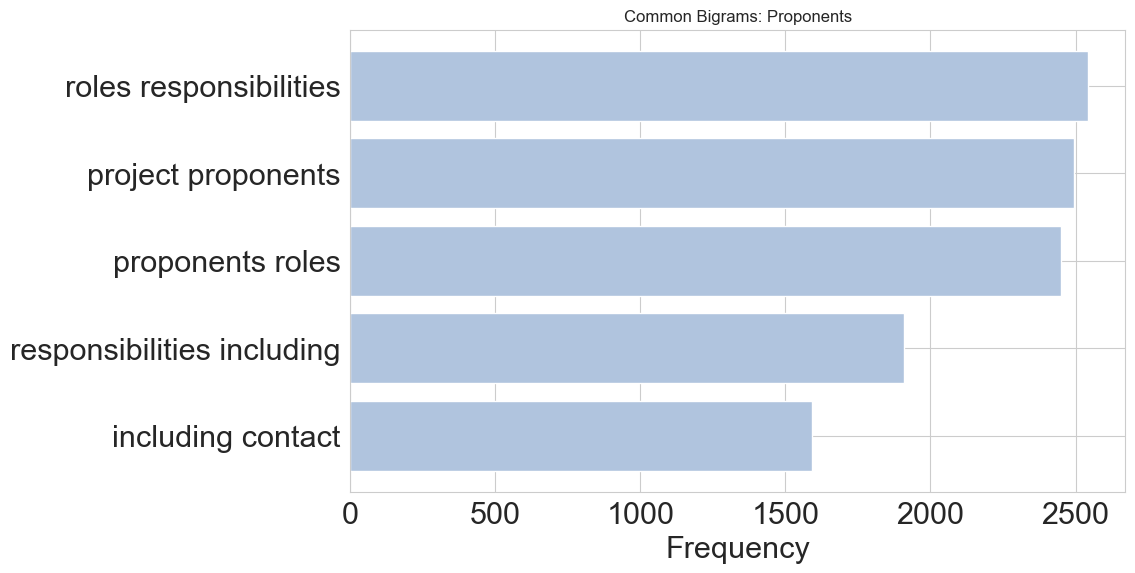

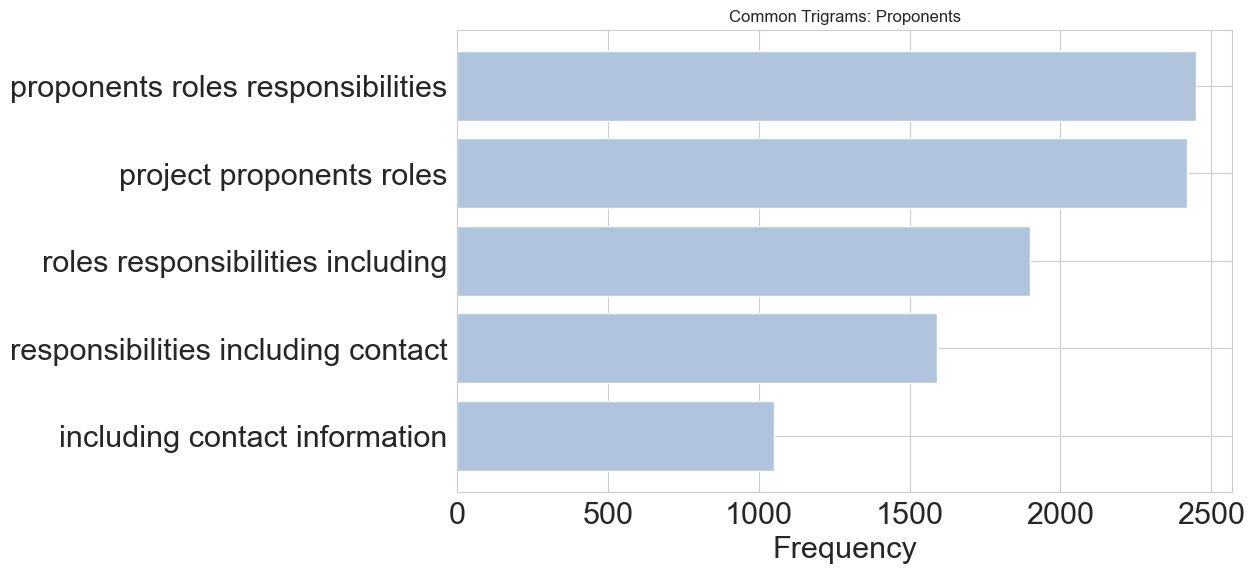

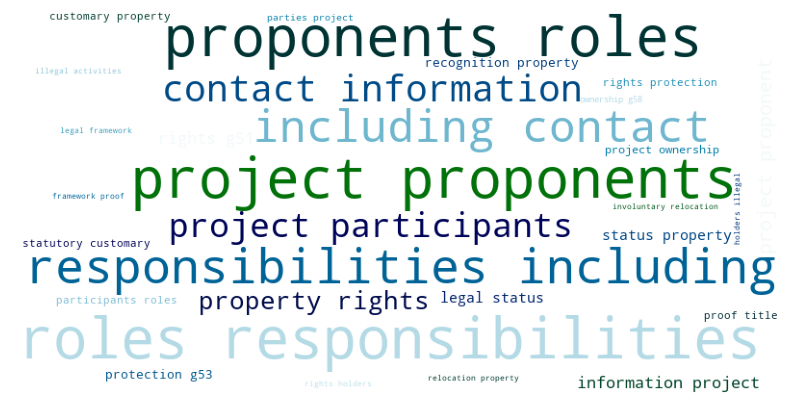

In [132]:
filtered_df = df[df['Category']=='Project Proponent']
project_proponents = [
    "project proponent",
    "name of person",
    "participants",
    "proof of title",
    "supplier data",
    "carbon offset developer",
    "objective",
    "ownership",
    "property"]
pattern = '|'.join(project_proponents)
matched_proponent = filtered_df[filtered_df['heading'].str.lower().str.contains(pattern)]



headings = matched_proponent['heading'].to_list()
cleaned_headings = [re.sub(r'[^\w\s]', '', heading.lower()) for heading in headings]
processed_headings = [' '.join([word for word in heading.split() if word not in stop_words]) for heading in cleaned_headings]

bigrams = generate_ngrams(processed_headings, n=2)
trigrams = generate_ngrams(processed_headings, n=3)

plot_ngram_frequencies(bigrams, title="Common Bigrams: Proponents")
plot_ngram_frequencies(trigrams, title="Common Trigrams: Proponents")

create_wordcloud(bigrams)

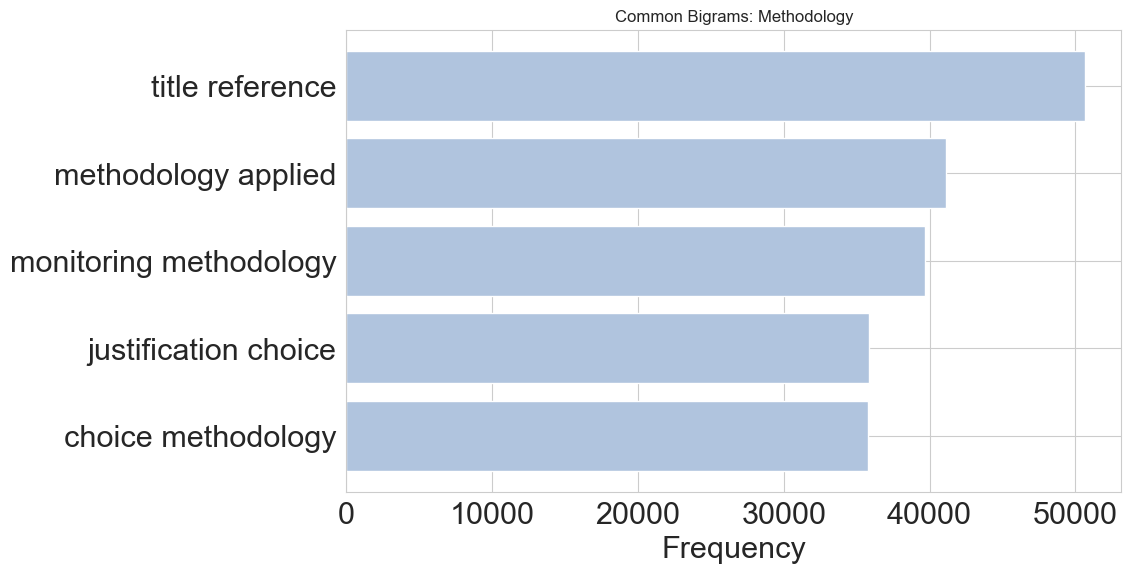

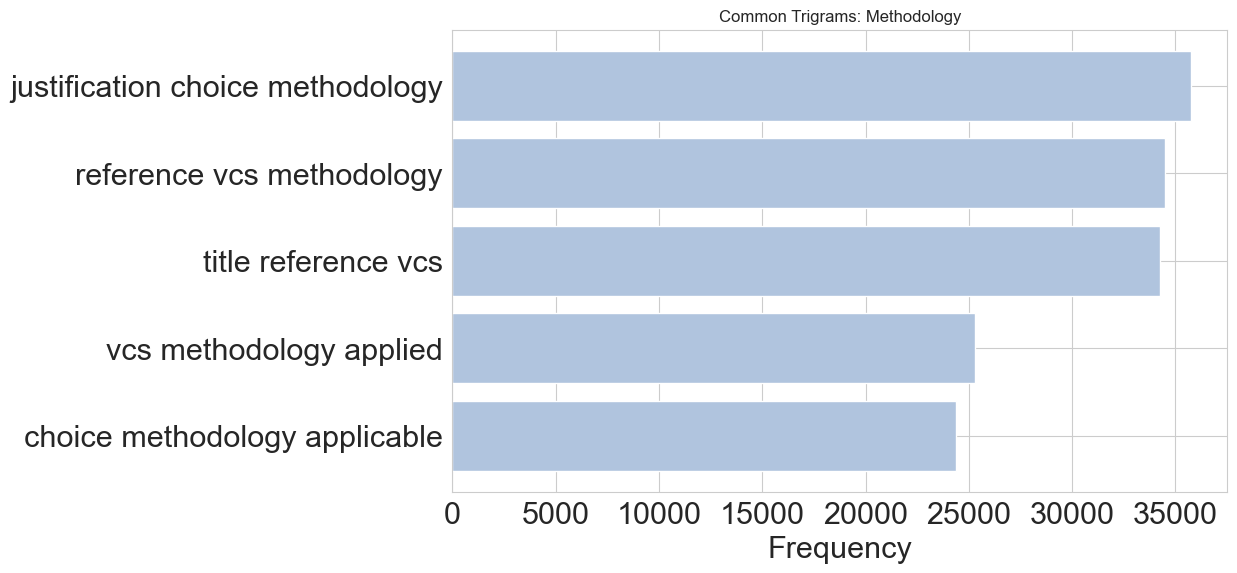

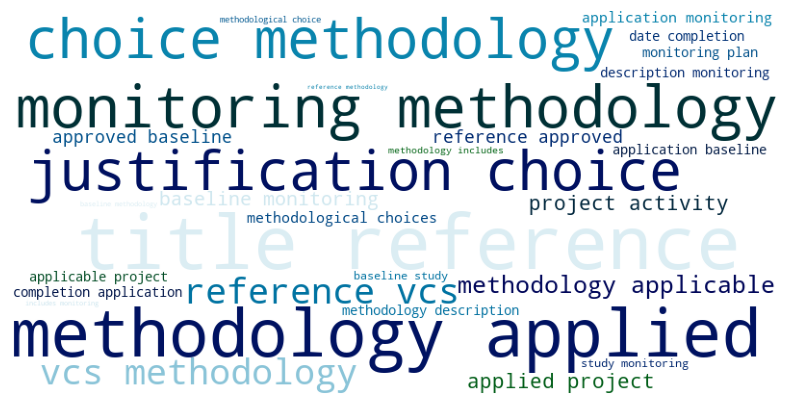

In [133]:
filtered_df = df[df['Category']=='Methodology']
methodology = ['methodology', 'methodologies','method']
pattern = '|'.join(methodology)
matched_methodology = df[df['heading'].str.lower().str.contains(pattern)]



headings = matched_methodology['heading'].to_list()
cleaned_headings = [re.sub(r'[^\w\s]', '', heading.lower()) for heading in headings]
processed_headings = [' '.join([word for word in heading.split() if word not in stop_words]) for heading in cleaned_headings]

bigrams = generate_ngrams(processed_headings, n=2)
trigrams = generate_ngrams(processed_headings, n=3)

plot_ngram_frequencies(bigrams, title="Common Bigrams: Methodology")
plot_ngram_frequencies(trigrams, title="Common Trigrams: Methodology")

create_wordcloud(bigrams)

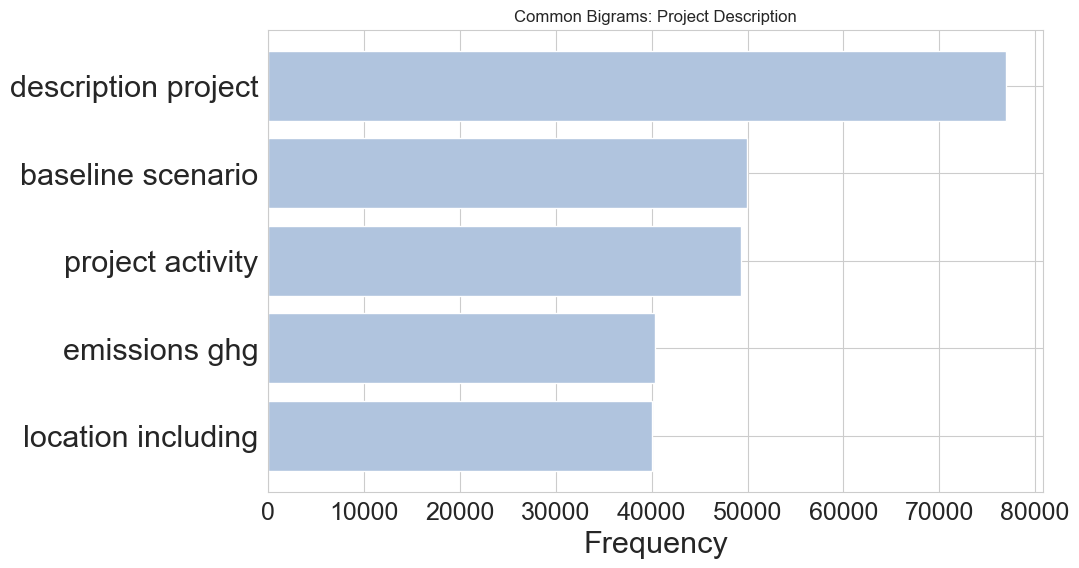

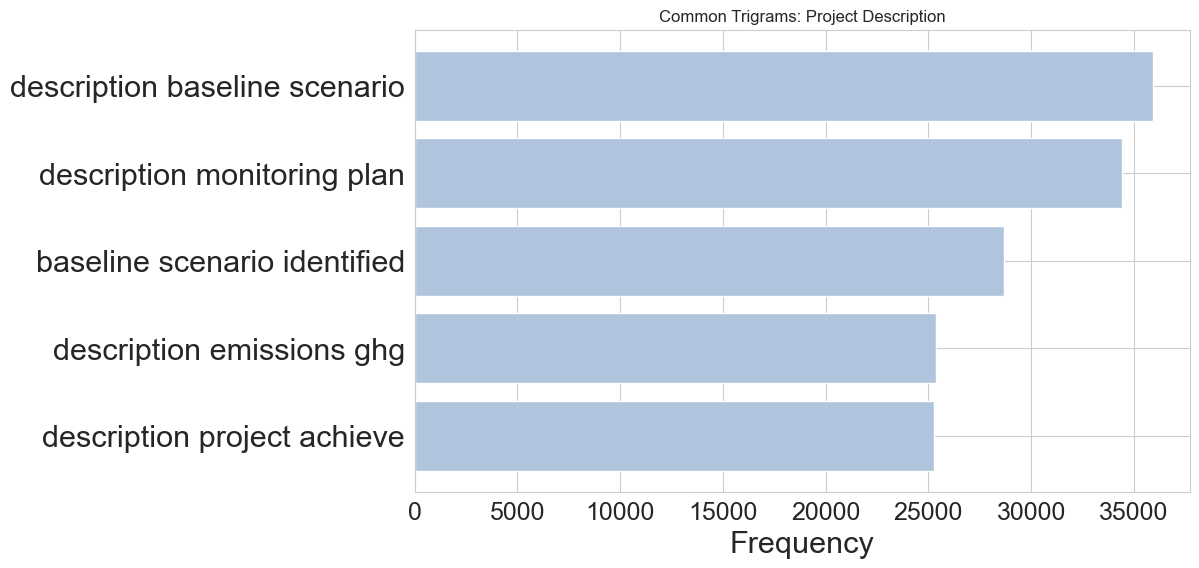

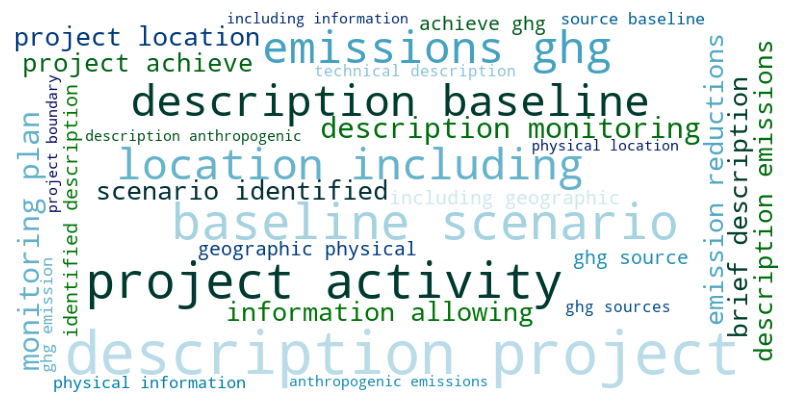

In [146]:
filtered_df = df[df['Category']=='Project Description']
project_desc = [
        "summary",
        "description",
        "additional information",
        "location",]
pattern = '|'.join(project_desc)
matched_project_desc = df[df['heading'].str.lower().str.contains(pattern)]



headings = matched_project_desc['heading'].to_list()
cleaned_headings = [re.sub(r'[^\w\s]', '', heading.lower()) for heading in headings]
processed_headings = [' '.join([word for word in heading.split() if word not in stop_words]) for heading in cleaned_headings]

bigrams = generate_ngrams(processed_headings, n=2)
trigrams = generate_ngrams(processed_headings, n=3)

plot_ngram_frequencies(bigrams, title="Common Bigrams: Project Description")
plot_ngram_frequencies(trigrams, title="Common Trigrams: Project Description")

create_wordcloud(bigrams)

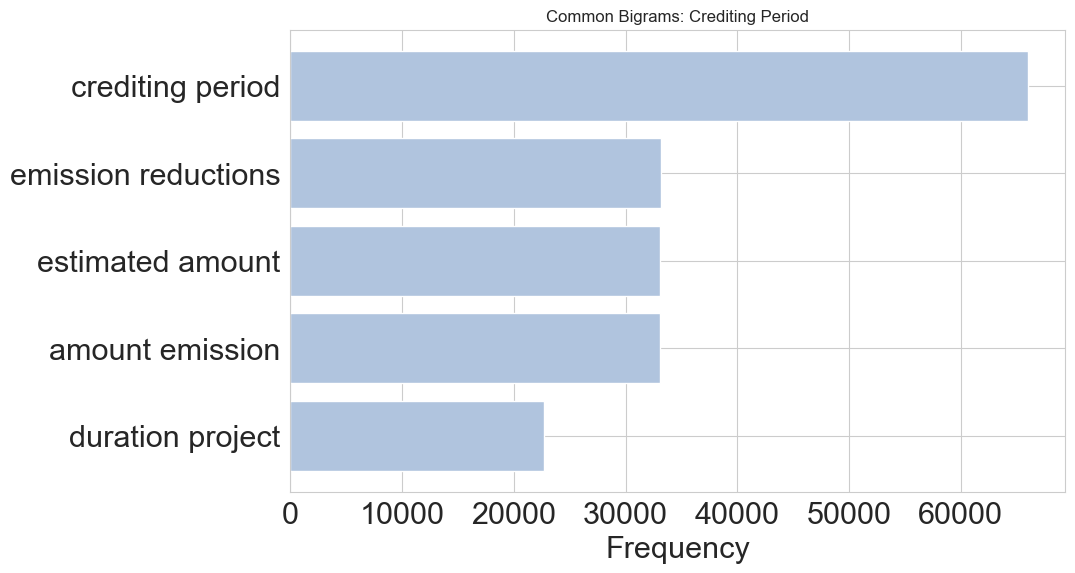

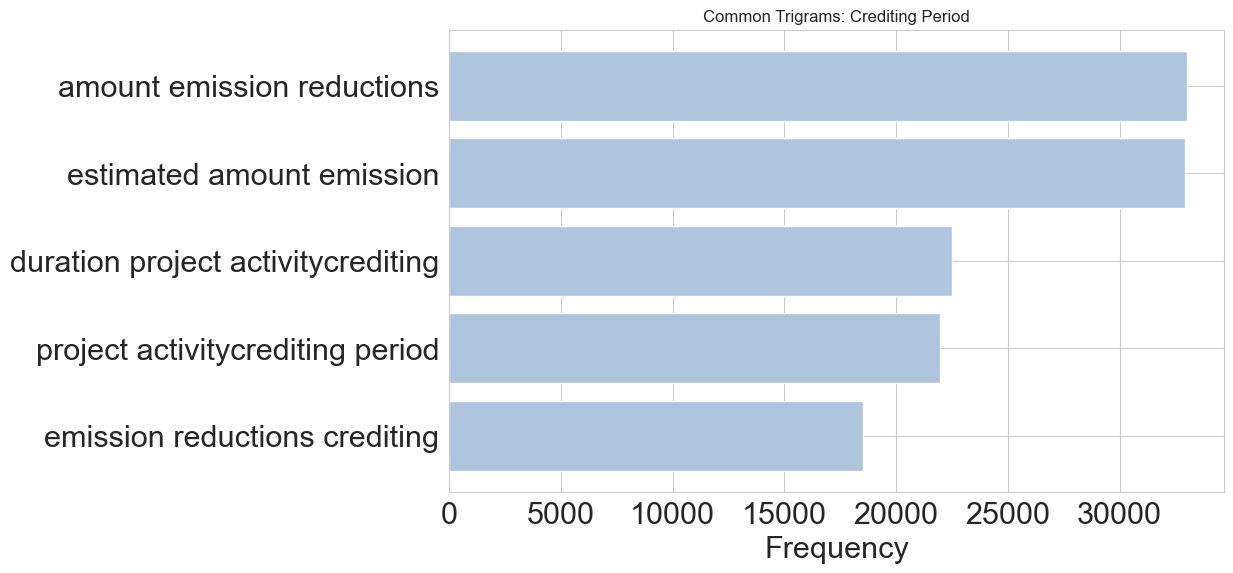

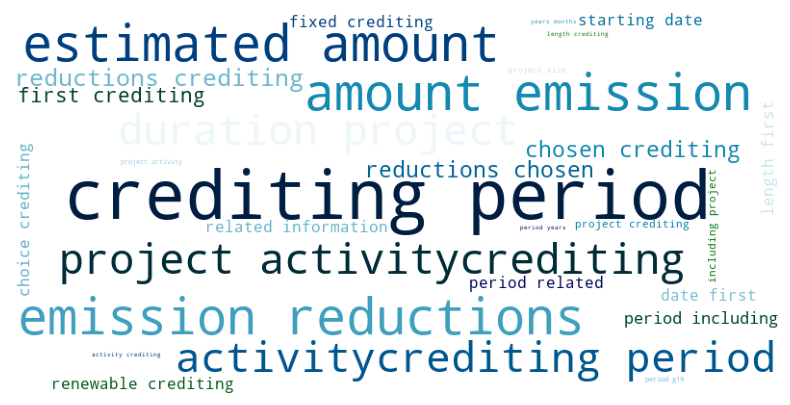

In [135]:
filtered_df = df[df['Category']=='Crediting Period']
credit_period = [
        "crediting period",
        "credit period",
        "crediting"]
pattern = '|'.join(credit_period)
matched_credit_period = df[df['heading'].str.lower().str.contains(pattern)]


headings = matched_credit_period['heading'].to_list()
cleaned_headings = [re.sub(r'[^\w\s]', '', heading.lower()) for heading in headings]
processed_headings = [' '.join([word for word in heading.split() if word not in stop_words]) for heading in cleaned_headings]

bigrams = generate_ngrams(processed_headings, n=2)
trigrams = generate_ngrams(processed_headings, n=3)

plot_ngram_frequencies(bigrams, title="Common Bigrams: Crediting Period")
plot_ngram_frequencies(trigrams, title="Common Trigrams: Crediting Period")

create_wordcloud(bigrams)

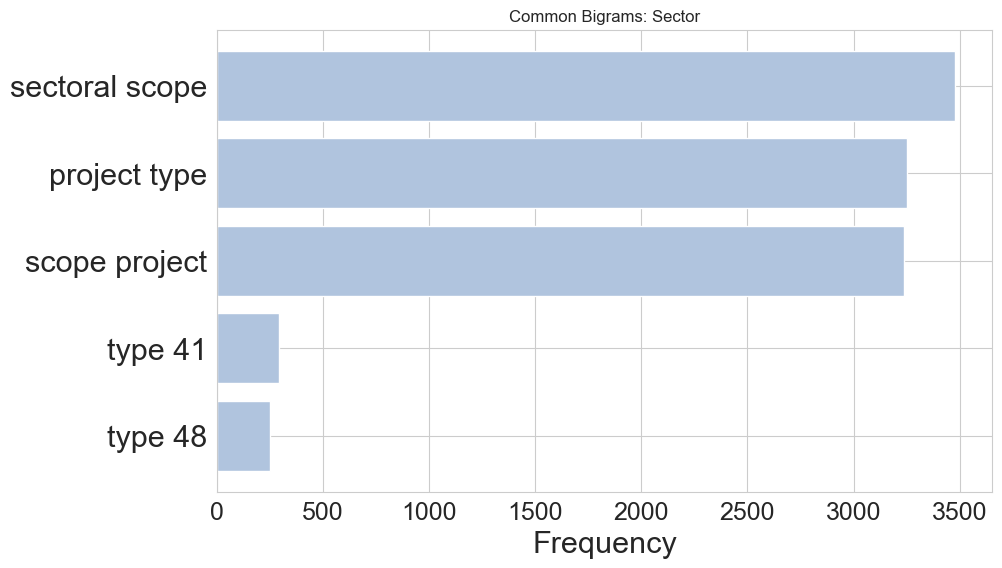

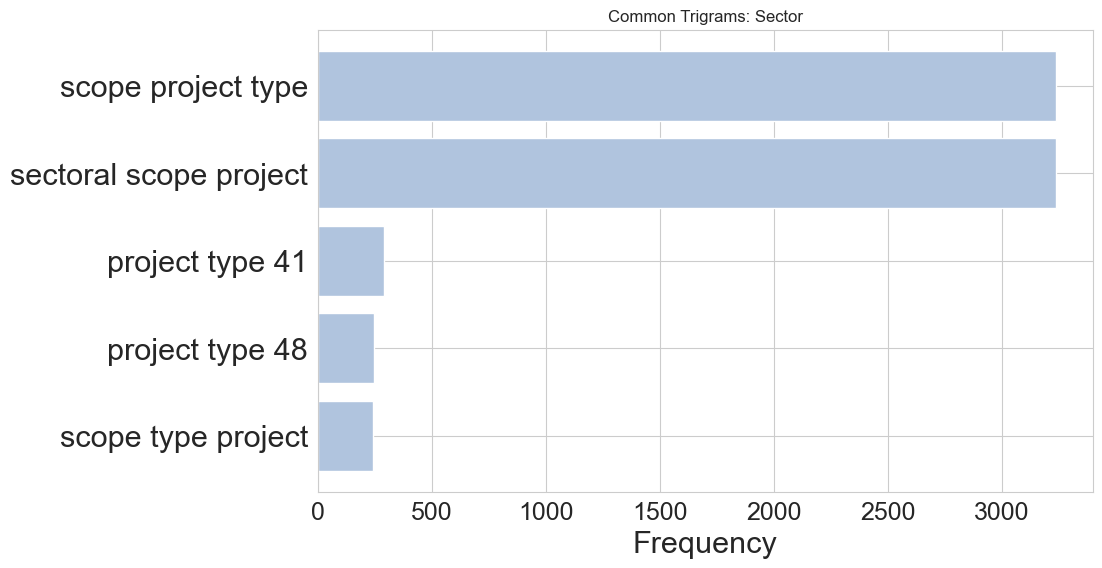

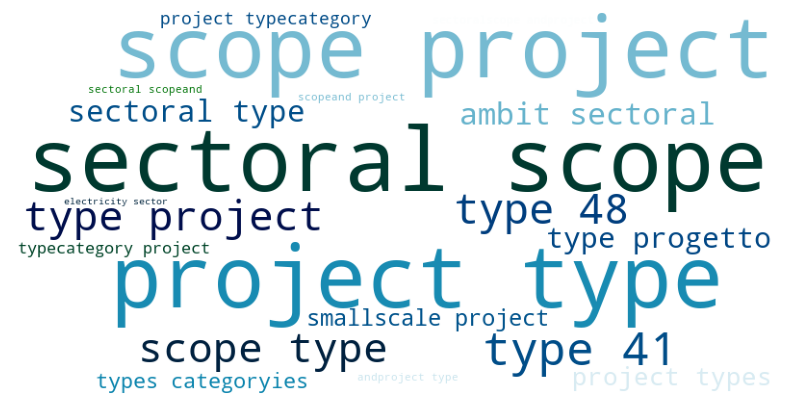

In [145]:
# filtered_df = df[df['Category']=='Sector']
# sector = [
#         "scope",
#         "project type",
#         "sectoral",
#         "sector"]
# pattern = '|'.join(sector)
# matched_sector = df[df['heading'].str.lower().str.contains(pattern)]
# matched_sector = matched_sector[~matched_sector['heading'].str.contains('Central Sector')]


# headings = matched_sector['heading'].to_list()
# cleaned_headings = [re.sub(r'[^\w\s]', '', heading.lower()) for heading in headings]
# processed_headings = [' '.join([word for word in heading.split() if word not in stop_words]) for heading in cleaned_headings]

bigrams = generate_ngrams(processed_headings, n=2)
trigrams = generate_ngrams(processed_headings, n=3)

plot_ngram_frequencies(bigrams, title="Common Bigrams: Sector")
plot_ngram_frequencies(trigrams, title="Common Trigrams: Sector")

create_wordcloud(bigrams)

In [142]:
# processed_headings = [h.replace('pproject', 'project').replace('scoope prooject', 'scope project').replace('sccope', 'scope').replace('prooject', 'project').replace('ssectoral', 'sectoral') for h in processed_headings]

In [ ]:
filtered_df = df[df['Category']=='GHG Emission Reduction']
ghg_emission_reions = [
        "emission reductduction",
        "greenhouse",
        "ghg emission",
        "greenhousegas",
        "estimated"]
pattern = '|'.join(ghg_emission_reductions)
matched_emission_reductions = df[df['heading'].str.lower().str.contains(pattern)]


headings = matched_emission_reductions['heading'].to_list()
cleaned_headings = [re.sub(r'[^\w\s]', '', heading.lower()) for heading in headings]
processed_headings = [' '.join([word for word in heading.split() if word not in stop_words]) for heading in cleaned_headings]

bigrams = generate_ngrams(processed_headings, n=2)
trigrams = generate_ngrams(processed_headings, n=3)

plot_ngram_frequencies(bigrams, title="Common Bigrams: GHG Emission Reductions")
plot_ngram_frequencies(trigrams, title="Common Trigrams: GHG Emission Reductions")

create_wordcloud(bigrams)

In [959]:
final_variants = {
"project_proponents": ["project proponent", "participants"],
"ghg_emission_reductions": ["ghg emission reduction", "estimated amount of emission reduction"],
"methodology": ["methodology", "methodologies"],
"project_location": ["project location", "location of project", "location of the project", "location of the small-scale project", "project zone map"],
"credit_period": ["crediting period", "credit period"],                                                     
"sector": ["project type", "type of project", "sectoral scope", "sectorial scope", "sector scope", "ambit or sectoral and type of progetto", "category(ies) of project activity", "type and category(ies) and technology/measure of the small-scale project activity", "category of the project"]
}

In [960]:
def assign_section_key(row, final_variants):
    for key, variants in final_variants.items():
        if any(row['heading'].lower().strip().find(variant.lower()) != -1 for variant in variants):
            return key
    return None

toc['matched_section_key'] = toc.apply(assign_section_key, axis=1, final_variants=final_variants)

In [1001]:
toc['original_section'] = toc['section']
toc['section'] = toc['section'].apply(map_alphabet_to_digit).astype('int')

In [1002]:
filter_df = toc[['section', 'id', 'Project Sector', 'matched_section_key', 'heading', 'original_section']].drop_duplicates(subset=['id', 'matched_section_key'], keep='first')

KeyError: "['matched_section_key'] not in index"

In [964]:
energy_df = filter_df[filter_df['Project Sector']=='Renewable Energy']

agg_data = energy_df.groupby(['matched_section_key', 'section'])['id'].nunique().unstack(fill_value=0)
percentage_data = agg_data.div(agg_data.sum(axis=1), axis=0) * 100
percentage_data.reset_index(inplace=True)
plot_data_long = percentage_data.melt(id_vars='matched_section_key', var_name='Section', value_name='percentage')
plot_data_long = plot_data_long.sort_values(by='Section')

stacked_bar_chart(
    df=plot_data_long,
    title='Percentage of Sections within Each Category',
    color='Section',
    x='percentage',
    y='matched_section_key'
)

In [966]:
forestry_df = filter_df[filter_df['Project Sector']=='Forestry and Land Use']

agg_data = forestry_df.groupby(['matched_section_key', 'section'])['id'].nunique().unstack(fill_value=0)
percentage_data = agg_data.div(agg_data.sum(axis=1), axis=0) * 100
percentage_data.reset_index(inplace=True)
plot_data_long = percentage_data.melt(id_vars='matched_section_key', var_name='Section', value_name='percentage')
plot_data_long = plot_data_long.sort_values(by='Section')

stacked_bar_chart(
    df=plot_data_long,
    title='Percentage of Sections within Each Category',
    color='Section',
    x='percentage',
    y='matched_section_key'
)

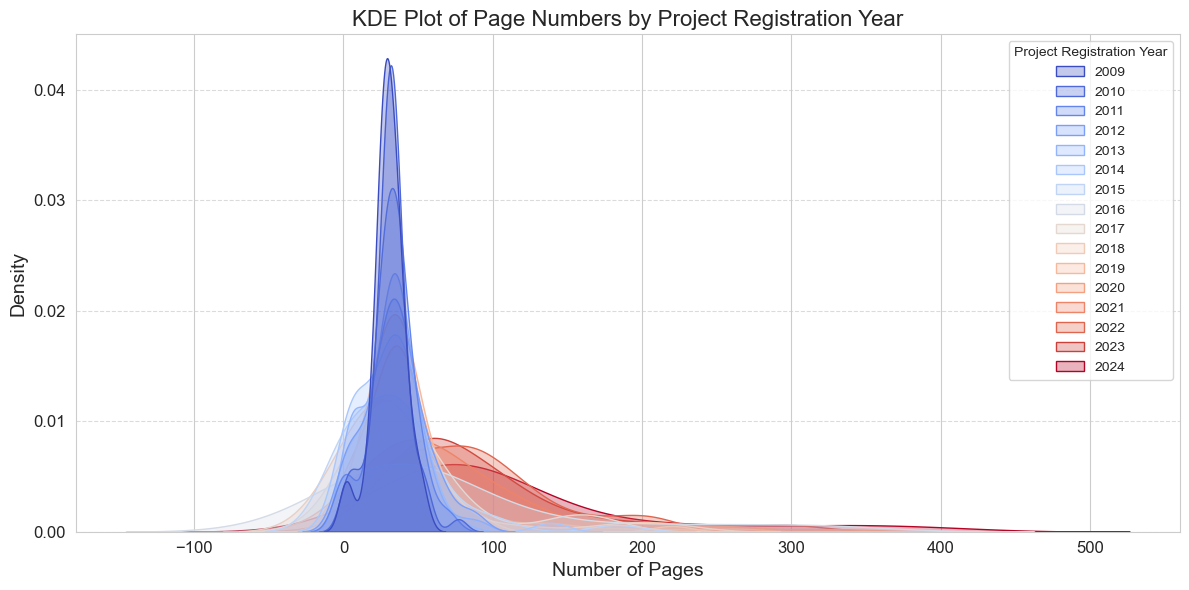

In [986]:
filter_df = toc_project_level[toc_project_level['Project Registration Year'] != 'Not Available']
filter_df['Project Registration Year'] = filter_df['Project Registration Year'].astype(int)

# Set up the KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=filter_df, x='page_number', hue='Project Registration Year', fill=True, common_norm=False, palette='coolwarm', alpha=0.3)

# Customize plot
plt.xlabel('Number of Pages', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.title('KDE Plot of Page Numbers by Project Registration Year', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

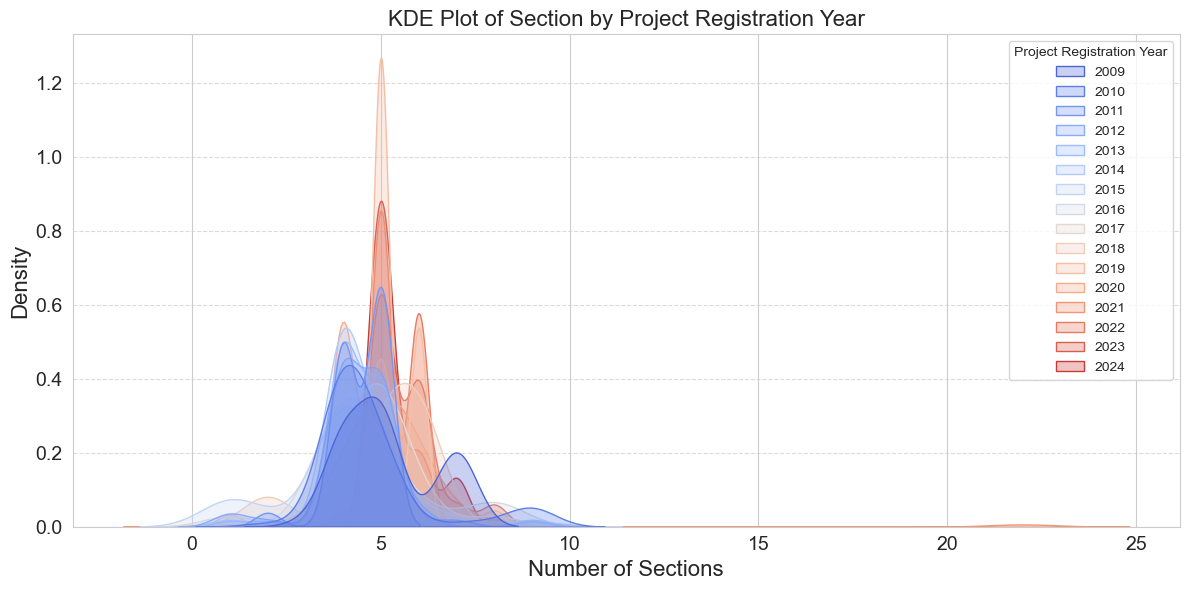

In [945]:
filter_df = toc_project_level[toc_project_level['Project Registration Year'] != 'Not Available']
filter_df['number_of_sections'] = filter_df['number_of_sections'].apply(map_alphabet_to_digit).astype('int')
filter_df['number_of_sections'] = filter_df['number_of_sections'].astype(int)

plt.figure(figsize=(12, 6))
filter_df = filter_df.sort_values(by='Project Registration Year')
sns.kdeplot(data=filter_df, x='number_of_sections', hue='Project Registration Year', fill=True, common_norm=False, palette='coolwarm', alpha=0.3)

plt.xlabel('Number of Sections', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.title('KDE Plot of Section by Project Registration Year', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

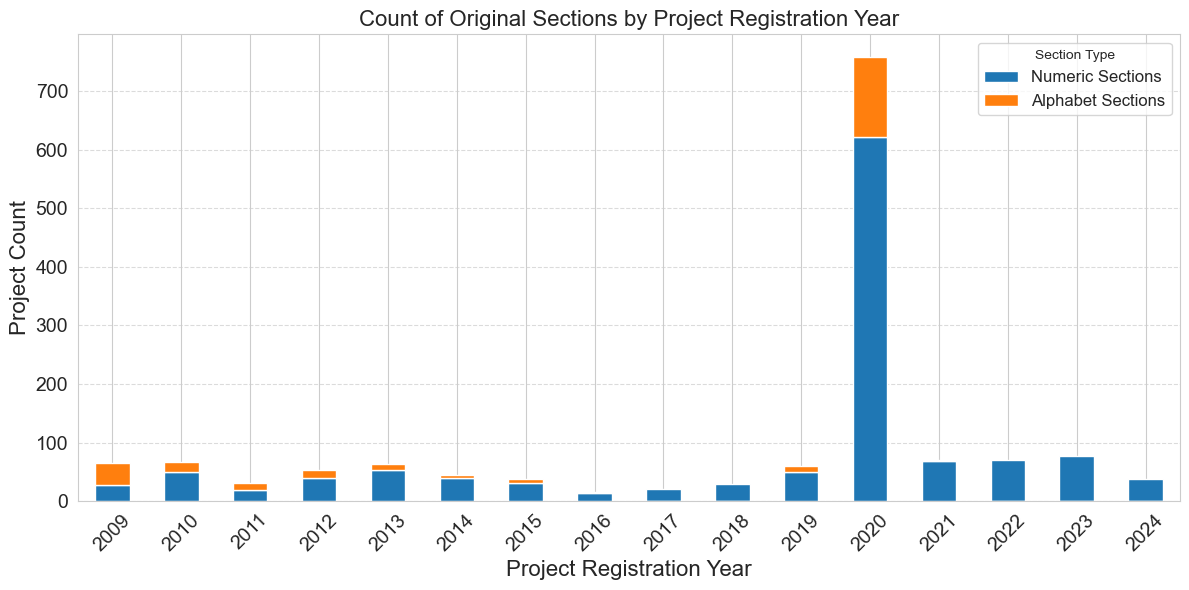

In [1004]:
filter_df = toc[toc['Project Registration Year'] != 'Not Available']

filter_df['is_alpha'] = filter_df['original_section'].apply(lambda x: x.isalpha())
grouped_data = filter_df.groupby(['Project Registration Year', 'is_alpha'])['id'].nunique().unstack(fill_value=0)
grouped_data.columns = ['Numeric Sections', 'Alphabet Sections']

plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Project Registration Year', fontsize=16)
plt.ylabel('Project Count', fontsize=16)
plt.title('Count of Original Sections by Project Registration Year', fontsize=16)
plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.legend(title='Section Type', fontsize=12,  frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

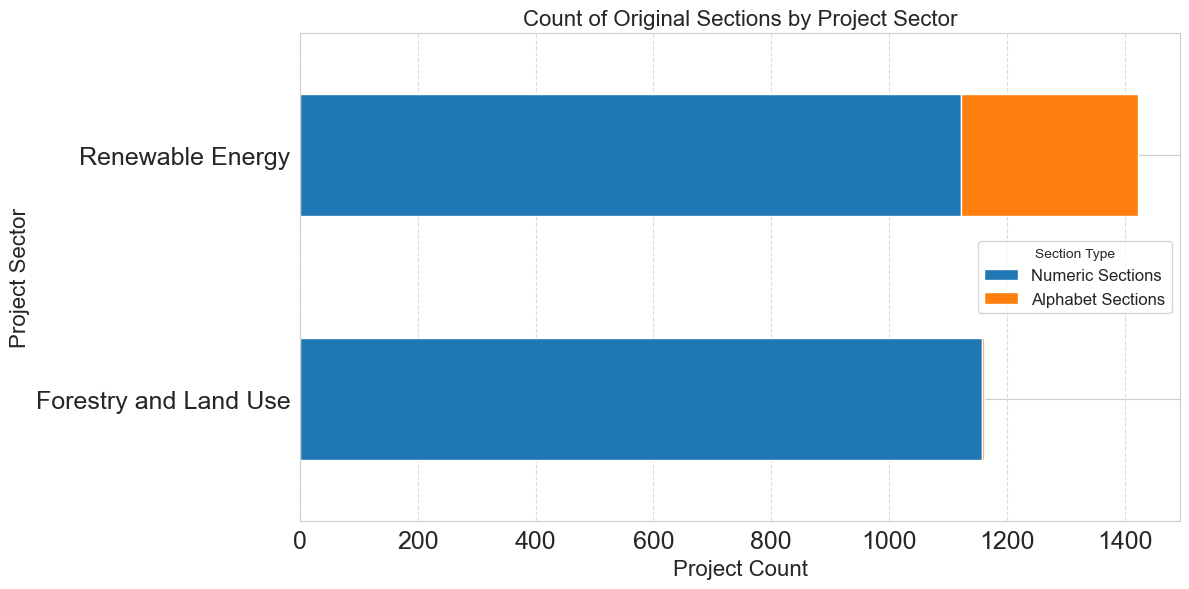

In [939]:
filter_df = toc
filter_df['is_alpha'] = filter_df['original_section'].apply(lambda x: x.isalpha())

# Group by Project Sector and whether sections are alphabetic or numeric, counting unique ids
grouped_data = filter_df.groupby(['Project Sector', 'is_alpha'])['id'].nunique().unstack(fill_value=0)
grouped_data.columns = ['Numeric Sections', 'Alphabet Sections']

# Create the horizontal stacked bar plot
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='barh', stacked=True, ax=plt.gca())

# Customize labels and title
plt.ylabel('Project Sector', fontsize=16)
plt.xlabel('Project Count', fontsize=16)
plt.title('Count of Original Sections by Project Sector', fontsize=16)
plt.yticks(fontsize=18)
plt.yticks(rotation=0)
plt.xticks(fontsize=18) 
plt.legend(title='Section Type', fontsize=12,  frameon=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

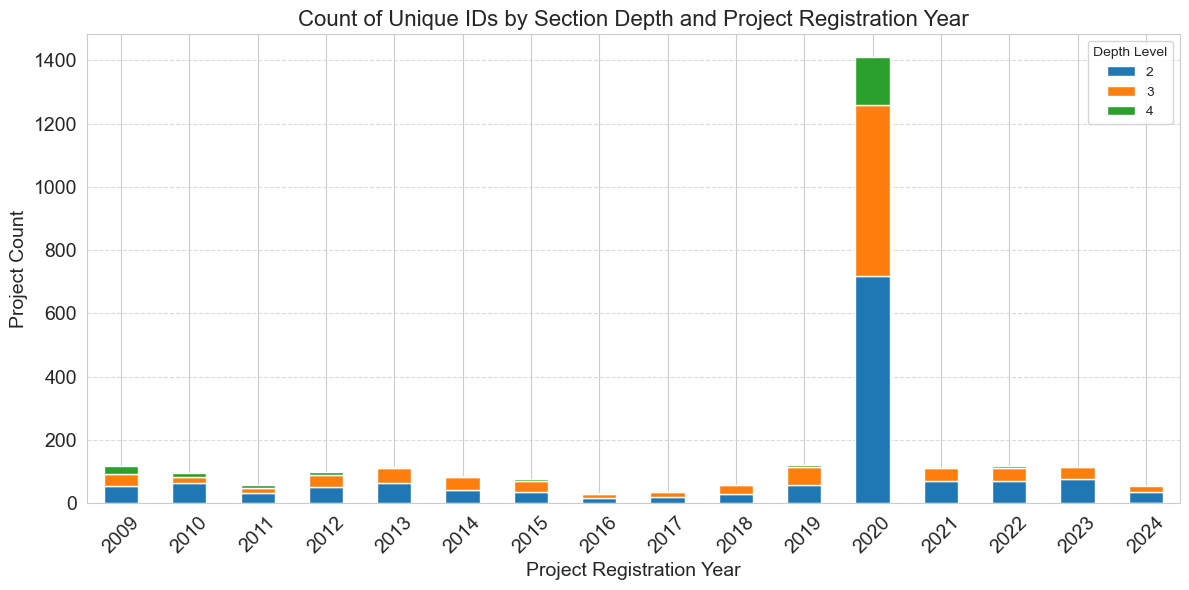

In [891]:
filter_df = toc[toc['Project Registration Year'] != 'Not Available']

filter_df['depth'] = filter_df['section_number'].apply(lambda x: len([part for part in x.split('.') if part]))
grouped_data = filter_df.groupby(['Project Registration Year', 'depth'])['id'].nunique().unstack(fill_value=0)

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Project Registration Year', fontsize=14)
plt.ylabel('Project Count', fontsize=14)
plt.title('Count of Unique IDs by Section Depth and Project Registration Year', fontsize=16)
plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.legend(title='Depth Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [957]:
filter_df = toc[toc['Project Registration Year'] == '2024']

agg_data = filter_df.groupby(['matched_section_key', 'section'])['id'].nunique().unstack(fill_value=0)
percentage_data = agg_data.div(agg_data.sum(axis=1), axis=0) * 100
percentage_data.reset_index(inplace=True)
plot_data_long = percentage_data.melt(id_vars='matched_section_key', var_name='Section', value_name='percentage')
plot_data_long = plot_data_long.sort_values(by='Section')

stacked_bar_chart(
    df=plot_data_long,
    title='Percentage of Sections within Each Category',
    color='Section',
    x='percentage',
    y='matched_section_key'
)

# Coverage Assessment

In [611]:
heading_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/intermediate/analysis/table_of_contents.csv')

In [612]:
def _coverage_assessment(headings):
    total_project = heading_df.id.nunique()
    result = []
    filtered_dfs = pd.DataFrame()
    for topic in headings:
        variants = headings[topic]
        for variant in variants:
            df_filtered = heading_df[heading_df['section'].str.contains(re.escape(variant), case=False)]
            df_filtered['topic'] = topic
            filtered_dfs = pd.concat([filtered_dfs, df_filtered], ignore_index=True)

        ids = filtered_dfs[filtered_dfs['topic']==topic].id.nunique()
        result.append({topic: round(ids/total_project,2)})
    
    return result

In [613]:
prelim_variants =  {
    "project_proponents": [
        "project proponent",
        "projectpropoonent",
        "promotorul de proiect",
        "proponente del proyecto",
    ],
    "ghg_emission_reductions": [
        "estimated ghg emission reductions",
        "reduceri și eliminări nete de emisii de ges",
    ]}

In [614]:
variants = {
"project_proponents": ["project proponent"],
"ghg_emission_reductions": ["ghg emission reduction"],
"methodology": ["methodology", "methodologies"],
"project_location": ["project location"],
"credit_period": ["crediting period"],
"sector": ["sectoral scope", "project type"]
}

In [615]:
_coverage_assessment(prelim_variants)

[{'project_proponents': 0.84}, {'ghg_emission_reductions': 0.73}]

In [616]:
_coverage_assessment(variants)

[{'project_proponents': 0.84},
 {'ghg_emission_reductions': 0.86},
 {'methodology': 0.96},
 {'project_location': 0.77},
 {'credit_period': 0.95},
 {'sector': 0.76}]

In [649]:
final_variants = {
"project_proponents": ["project proponent", "participants"],
"ghg_emission_reductions": ["ghg emission reduction", "estimated amount of emission reduction"],
"methodology": ["methodology", "methodologies"],
"project_location": ["project location", "location of project", "location of the project", "location of the small-scale project", "project zone map"],
"credit_period": ["crediting period", "credit period"],                                                     
"sector": ["project type", "type of project", "sectoral scope", "sectorial scope", "sector scope", "ambit or sectoral and type of progetto", "category(ies) of project activity", "type and category(ies) and technology/measure of the small-scale project activity", "category of the project"]
}


# Location of project activity
# Location of the small-scale project activity
# Location of the project activity

# type and category(ies) and technology/measure of the small-scale project activity
# category(ies) of project activity
# Sectoral Scope and Project Type
# Sectorial Scope and Project Type
# Sector Scope and Project Type
# Sectoral scope and type of project
# Ambit or sectoral and type of Progetto

In [650]:
_coverage_assessment(final_variants)

[{'project_proponents': 0.96},
 {'ghg_emission_reductions': 0.96},
 {'methodology': 0.96},
 {'project_location': 0.94},
 {'credit_period': 0.95},
 {'sector': 0.93}]

In [639]:
variants = ["project type", "type of project", "sectoral scope", "sectorial scope", "sector scope", "ambit or sectoral and type of progetto", "category(ies) of project activity", "type and category(ies) and technology/measure of the small-scale project activity", "category of the project"]
# variants = ["project location", "location of project", "location of the project", "location of the small-scale project"]
# variants = ["project proponent", "participants"]
# variants = ["ghg emission reduction", "estimated amount of emission reduction"]
# variants = ["methodology", "methodologies"]
# variants = ["crediting period", "credit period"]

pattern = '|'.join([re.escape(variant) for variant in variants])
ids = heading_df[heading_df['section'].str.contains(pattern, case=False)].id.unique()

In [640]:
total_ids = heading_df.id.unique()

In [641]:
mismatched_id = set(total_ids) - set(ids)

In [642]:
df = heading_df[heading_df['id'].isin(mismatched_id)]
df.to_csv('sector.csv', index=False)

In [605]:
# fix_ids = [1229,1231,100,1232,1066,1237,101,1120,1070,1194,1078,1122,1028,1130,1131,1132,1030,1088,1033,1288,103,1041,1043,104,1147,1215,114,1051,1052,1156,1162,1168,1486,130,1367,1372,1566,1374,142,1502,1319,131,1571,1378,1505,158,1384,1443,1449,1452,1458,1460,1537,153,1467,1339,133,1541,1340,1341,1547,1658,1354,1355,1417,1695,180,1730,1733,1748,1861,1831,1862,198,1,1853,1774,166,195,1674,1961,1677,1969,1902,168,1983,1909,268,2076,26,201,202,2338,255,2033,257,235,260,2278,2497,2623,2395,253,287,3050,2833,321,2950,3278,2965,3142,3295,347,34,3506,351,3431,3344,359,3706,360,343,361,3447,357,358,3726,3727,369,388,389,3902,4123,3811,4061,3832,383,384,4165,429,3746,3999,386,3773,377,410,423,424,4784,4543,455,4563,459,447,4485,4841,4718,4627,484,4646,464,438,485,4527,502,558,560,562,630,514,639,492,641,516,576,51,579,64,52,586,4956,534,658,663,601,602,665,549,66,550,611,672,615,673,621,624,674,67,687,694,698,69,701,704,709,75,720,764,722,891,725,768,954,774,899,737,958,89,8,784,959,902,95,838,788,839,747,960,700,792,904,906,966,803,913,859,922,931,977,97,980,936,876,943,981,886,985,98,994,996,1115,1013,1027,1262,1201,1086,1096,1102,1315,1579,1445,1448,1453,1477,1657,1359,1360,1404,1408,1418,1784,1811,1821,1825,1826,1832,1864,1865,1866,1847,1993,1765,1945,1848,1855,1663,1895,1953,1775,1896,1897,1898,1899,1900,2305,2310,2405,2070,2408,2016,2082,2083,2412,2413,2418,2087,2031,2451,2565,2339,2343,2458,245,2345,2566,2571,2356,2250,2252,2609,2495,2370,2611,2378,2290,2379,2387,2391,2510,2301,2652,2538,2403,2723,2743,2745,3002,2884,2748,3024,2893,275,3203,3055,3210,3215,2852,3216,308,3294,3156,3167,3173,3179,3334,3336,3337,3400,3338,3479,3401,3339,3421,3423,3341,3430,3542,3549,3602,3708,3610,3611,3612,3618,3712,3619,3620,3450,3722,3629,3385,3723,3724,3630,3457,3461,3462,3595,3463,3596,3396,3397,3398,3653,3399,3319,3675,3738,3739,3692,3786,3788,4121,3897,4122,4034,4264,3919,4042,4136,3923,4265,3927,3816,4272,4163,3960,3843,4294,4175,4178,3767,4010,4016,4204,4218,4102,4107,4110,4117,4240,4246,4254,4429,4439,4802,4681,4446,4687,4451,4689,4886,4690,4606,4702,4483,4348,4369,4372,4490,4724,4854,4497,4865,4747,4749,4391,4516,4392,4525,4766,4881,4770,5001,5027,5046,494,529,4962,4967,4968,4982,5098,5104,676,4993,681,950,951,789,793,798,844,802,811,2512,3040,324,527,528,1503,1040,1098,1490,1433,1318,2469,2482,2369,2508,2385,2974,2975,2976,3057,2842,3218,2934,3304,3152,334,338,3645,4268,3818,4814,4671,4877,4912,513,4918,791,240,266,964,810,]

In [606]:
# final_df = heading_df[~heading_df['id'].isin(fix_ids)]

In [610]:
# final_df.to_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/table_of_contents.csv', index=False)

# Similarity Score

In [286]:
sentences = ["project proponents (G1.1) 13",
"project proponent"]

embeddings = [nlp(sentence).vector for sentence in sentences]

def squared_sum(x):
  """ return 3 rounded square rooted value """
 
  return round(sqrt(sum([a*a for a in x])),3)


def cos_similarity(x,y):
  """ return cosine similarity between two lists """
 
  numerator = sum(a*b for a,b in zip(x,y))
  denominator = squared_sum(x)*squared_sum(y)
  return round(numerator/float(denominator),3)

cos_similarity(embeddings[0], embeddings[1])

0.166

In [311]:
proponent_df['heading'].unique()

array(['1.5 Project Proponent', '2.1.3 Project Proponent (G1.1)',
       '1.3 Project Proponent', '1.4 PROJECT PROPONENT',
       '1.4.1 MULTIPLE PROJECT PROPONENTS', '1.1 Project title',
       '1.15 Project participants, roles and responsibilities',
       '1.4 Project Proponent (G1.1)',
       '1.3.3 Description of Communities Located in Project Zone, Including Basic Socio-Economic and',
       '1.3.4 Current Land Use, Customary and Legal Property Rights, and any Ongoing or Unresolved',
       '1.3.5 Current Biodiversity in Project Zone (species and ecosystems), and Threats to that',
       '2.7.1 Community and Stakeholder Identification and Involvement in Project Design (G3.8) ........ 67',
       '3.1 COMPLIANCE WITH LAWS, STATUES, PROPERTY RIGHTS AND OTHER REGULATORY FRAMEWORKS (G4 & G5)',
       '3.1.2 Compliance with Relevant National and Local Laws, Regulations, and International',
       '3.1.3 Approval from the Appropriate Authorities, Including Established Formal and/or Tra

In [279]:
# Load the spaCy model (or any other pre-trained model for embeddings)
nlp = spacy.load("en_core_web_md")  # Use a medium-sized model for decent embeddings

# Filter DataFrame
proponent_df = df[(df['category'] == 'project_proponent') & (~df['heading_name'].isna())]

# Text to compare
text_to_compare = 'project proponent'

# Extract headings and add the text to compare to the list
all_texts = proponent_df['heading_name'].tolist() + [text_to_compare]

# Compute embeddings
embeddings = [nlp(text).vector for text in all_texts]

# Separate embeddings for headings and the text to compare
heading_embeddings = embeddings[:-1]
compare_embedding = embeddings[-1:]

# Compute cosine similarities
cosine_similarities = cosine_similarity(compare_embedding, heading_embeddings)

# Add cosine similarities to DataFrame
proponent_df['cosine_similarity'] = cosine_similarities.flatten()

# Display results
result_df = proponent_df[['cosine_similarity', 'heading_name']].drop_duplicates()
result_df

C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_6512\1757176707.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proponent_df['cosine_similarity'] = cosine_similarities.flatten()


,cosine_similarity,heading_name
4,0.757072,Project Proponent
63,0.161884,Project Proponent (G1.1)
396,-0.010314,PROJECT PROPONENT
397,0.033307,MULTIPLE PROJECT PROPONENTS
1105,0.468080,Project title
1119,0.691310,"Project participants, roles and responsibilities"
1312,0.551326,Description of Communities Located in Project ...
1313,0.501269,"Current Land Use, Customary and Legal Property..."
1314,0.542364,Current Biodiversity in Project Zone (species ...
1316,0.510003,Community and Stakeholder Identification and I...


In [52]:
proponent_df = df[(df['category'] == 'project_proponent') & (~df['heading_name'].isna())]

text_to_compare = 'project proponent'

all_texts = proponent_df['heading_name'].tolist() + [text_to_compare]

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(all_texts)

cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

proponent_df['cosine_similarity'] = cosine_similarities.flatten()
proponent_df[['cosine_similarity', 'heading_name']].drop_duplicates()

C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_18564\305920703.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proponent_df['cosine_similarity'] = cosine_similarities.flatten()


,cosine_similarity,heading_name
4,1.000000,Project Proponent
63,0.460891,Project Proponent (G1.1)
396,1.000000,PROJECT PROPONENT
397,0.122292,MULTIPLE PROJECT PROPONENTS
1105,0.123531,Project title
1119,0.086633,"Project participants, roles and responsibilities"
1312,0.037869,Description of Communities Located in Project ...
1313,0.000000,"Current Land Use, Customary and Legal Property..."
1314,0.036323,Current Biodiversity in Project Zone (species ...
1316,0.038128,Community and Stakeholder Identification and I...


In [53]:
def jaccard_similarity(set1, set2):
    """Compute the Jaccard similarity between two sets."""
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0


proponent_df = df[(df['category'] == 'project_proponent') & (~df['heading_name'].isna())]

# Text to compare
text_to_compare = 'project proponent'

# Convert text to sets of words
proponent_df['text_set'] = proponent_df['heading_name'].apply(lambda x: set(x.lower().split()))
text_to_compare_set = set(text_to_compare.lower().split())

# Compute Jaccard similarity for each row
proponent_df['jaccard_similarity'] = proponent_df['text_set'].apply(lambda x: jaccard_similarity(x, text_to_compare_set))

# Drop the helper column
proponent_df = proponent_df.drop(columns=['text_set'])
proponent_df[['jaccard_similarity', 'heading_name']]

C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_18564\2093710776.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proponent_df['text_set'] = proponent_df['heading_name'].apply(lambda x: set(x.lower().split()))
C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_18564\2093710776.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proponent_df['jaccard_similarity'] = proponent_df['text_set'].apply(lambda x: jaccard_similarity(x, text_to_compare_set))


,jaccard_similarity,heading_name
4,1.000000,Project Proponent
63,0.666667,Project Proponent (G1.1)
207,0.666667,Project Proponent (G1.1)
345,1.000000,Project Proponent
396,1.000000,PROJECT PROPONENT
...,...,...
17854,0.100000,"Project proponents roles and responsibilities,..."
17877,0.250000,Project Proponents (G1.1)
18060,1.000000,Project Proponent
18093,1.000000,Project Proponent


In [54]:
# Filter the DataFrame
proponent_df = df[(df['category'] == 'project_proponent') & (~df['heading_name'].isna())]

# Text to compare
text_to_compare = 'project proponent'

# Compute Levenshtein distance
proponent_df['levenshtein_distance'] = proponent_df['heading_name'].apply(lambda x: Levenshtein.distance(x.lower(), text_to_compare.lower()))

# Optionally normalize the distance to a similarity score
max_distance = proponent_df['levenshtein_distance'].max()
proponent_df['normalized_similarity'] = 1 - (proponent_df['levenshtein_distance'] / max_distance)
proponent_df[['normalized_similarity', 'heading_name']]

C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_18564\4068191688.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proponent_df['levenshtein_distance'] = proponent_df['heading_name'].apply(lambda x: Levenshtein.distance(x.lower(), text_to_compare.lower()))
C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_18564\4068191688.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proponent_df['normalized_similarity'] = 1 - (proponent_df['levenshtein_distance'] / max_distance)


,normalized_similarity,heading_name
4,1.000000,Project Proponent
63,0.918605,Project Proponent (G1.1)
207,0.918605,Project Proponent (G1.1)
345,1.000000,Project Proponent
396,1.000000,PROJECT PROPONENT
...,...,...
17854,0.279070,"Project proponents roles and responsibilities,..."
17877,0.906977,Project Proponents (G1.1)
18060,1.000000,Project Proponent
18093,1.000000,Project Proponent


In [55]:
!pip install Levenshtein

In [56]:
def ngrams(text, n):
    """Generate n-grams from text."""
    tokens = text.split()
    n_grams = [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]
    return set(n_grams)

def jaccard_similarity(set1, set2):
    """Compute the Jaccard similarity between two sets."""
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0


# Filter the DataFrame
proponent_df = df[(df['category'] == 'project_proponent') & (~df['heading_name'].isna())]

# Text to compare
text_to_compare = 'project proponent'

# Convert text to n-grams
proponent_df['text_ngrams'] = proponent_df['heading_name'].apply(lambda x: ngrams(x.lower(), 2))  # Bigrams
text_to_compare_ngrams = ngrams(text_to_compare.lower(), 2)

# Compute Jaccard similarity for each row
proponent_df['jaccard_similarity'] = proponent_df['text_ngrams'].apply(lambda x: jaccard_similarity(x, text_to_compare_ngrams))

# Drop the helper column
proponent_df = proponent_df.drop(columns=['text_ngrams'])
proponent_df[['jaccard_similarity', 'heading_name']]

C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_18564\2976866356.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proponent_df['text_ngrams'] = proponent_df['heading_name'].apply(lambda x: ngrams(x.lower(), 2))  # Bigrams
C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_18564\2976866356.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proponent_df['jaccard_similarity'] = proponent_df['text_ngrams'].apply(lambda x: jaccard_similarity(x, text_to_compare_ngrams))


,jaccard_similarity,heading_name
4,1.0,Project Proponent
63,0.5,Project Proponent (G1.1)
207,0.5,Project Proponent (G1.1)
345,1.0,Project Proponent
396,1.0,PROJECT PROPONENT
...,...,...
17854,0.0,"Project proponents roles and responsibilities,..."
17877,0.0,Project Proponents (G1.1)
18060,1.0,Project Proponent
18093,1.0,Project Proponent


In [59]:
# Filter the DataFrame
proponent_df = df[(df['category'] == 'project_proponent') & (~df['heading_name'].isna())]

# Text to compare
text_to_compare = 'project proponent'
text_to_compare_doc = nlp(text_to_compare)

# Compute similarity
proponent_df['similarity'] = proponent_df['heading_name'].apply(lambda x: nlp(x).similarity(text_to_compare_doc))

proponent_df[['similarity', 'heading_name']]

C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_18564\370131737.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  proponent_df['similarity'] = proponent_df['heading_name'].apply(lambda x: nlp(x).similarity(text_to_compare_doc))
C:\Users\KornkamolSampaongern\AppData\Local\Temp\ipykernel_18564\370131737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proponent_df['similarity'] = proponent_df['heading_name'].apply(lambda x: nlp(x).similarity(text_to_compare_doc))


,similarity,heading_name
4,0.757072,Project Proponent
63,0.161884,Project Proponent (G1.1)
207,0.161884,Project Proponent (G1.1)
345,0.757072,Project Proponent
396,-0.010314,PROJECT PROPONENT
...,...,...
17854,0.653848,"Project proponents roles and responsibilities,..."
17877,0.152351,Project Proponents (G1.1)
18060,0.757072,Project Proponent
18093,0.757072,Project Proponent


In [60]:
!pip install gensim

^C


In [61]:
# Load pre-trained Word2Vec model
# This is a large file; make sure to download it from https://code.google.com/archive/p/word2vec/
model_path = 'path/to/word2vec/model.bin'
word2vec_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

def get_vector(text):
    """Get mean Word2Vec vector for a given text."""
    words = simple_preprocess(text)
    vectors = [word2vec_model[word] for word in words if word in word2vec_model]
    if not vectors:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(vectors, axis=0)

def cosine_similarity(vec1, vec2):
    """Compute cosine similarity between two vectors."""
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2)

# Sample DataFrame
data = {
    'category': ['project_proponent', 'project_proponent', 'other_category', 'project_proponent'],
    'heading_name': ['Project Proponent (G1.1)', 'Another Project Proponent', None, 'Completely different text']
}
df = pd.DataFrame(data)

# Filter the DataFrame
proponent_df = df[(df['category'] == 'project_proponent') & (~df['heading_name'].isna())]

# Text to compare
text_to_compare = 'project proponent'
text_to_compare_vector = get_vector(text_to_compare)

# Compute similarity
proponent_df['vector'] = proponent_df['heading_name'].apply(lambda x: get_vector(x))
proponent_df['similarity'] = proponent_df['vector'].apply(lambda x: cosine_similarity(text_to_compare_vector, x))

# Drop the vector column if not needed
proponent_df = proponent_df.drop(columns=['vector'])
proponent_df

KeyboardInterrupt: 

In [62]:
df.columns

Index(['id', 'filename', 'heading', 'category', 'State/Province', 'Proponent',
       'VCS Project Status', 'Estimated Annual Emission Reductions',
       'VCS Project Type', 'VCS Methodology', 'VCS Project Validator',
       'Project Registration Date', 'Crediting Period Term', 'links',
       'filename_raw', 'updated_date', 'file_size',
       'Project Registration Year', 'Credit Period Start', 'Credit Period End',
       'Project Life Time', 'Country', 'heading_number', 'heading_name',
       'section'],
      dtype='object')

In [73]:
df_nonnull = df.dropna(subset=['heading_name'])

In [85]:
df_nonnull = df.dropna(subset=['heading_name'])

mask = df_nonnull['heading_name'].str.lower().str.contains('ghg')

df_sector = df_nonnull[mask]

df_sector['heading_name'].unique()

array(['Project Scale and Estimated GHG Emission Reductions or Removals',
       'Participation under Other GHG Programs',
       'Estimated Net GHG Emission Reductions and Removals',
       'Net GHG Emission Reductions and Removals',
       'Estimated GHG Emission Reductions or Removals',
       'Projects Rejected by Other GHG Programs',
       'Quantification of GHG Emission Reductions and Removals',
       'Project Emissions (Actual net GHG removals by sinks)',
       'Net anthropogenic GHG removals by sinks',
       'GHG PROGRAMME ADMINISTRATORS',
       'PARTICIPATION UNDER OTHER GHG PROGRAMS',
       'PROJECTS REJECTED BY OTHER GHG PROGRAMS',
       'PROJECT SCALE AND ESTIMATED GHG EMISSION REDUCTIONS OR REMOVALS',
       'ESTIMATING GHG EMISSIONS FROM FIRE BREAKS',
       'ESTIMATING NET GHG SEQUESTRATION FROM ANR ACTIVITIES',
       'ESTIMATING NET GHG EMISSIONS FROM CFE ACTIVITIES',
       'ESTIMATING NET GHG EMISSIONS FROM HARVESTING',
       'SUMMARY OF GHG EMISSION REDUCTIO

In [82]:
df_nonnull = df.dropna(subset=['heading_name'])

mask = df_nonnull['heading_name'].str.lower().str.contains('credit period')

df_sector = df_nonnull[mask]

df_sector['heading_name'].unique()

array([], dtype=object)